#### Maestría en Inteligencia de Negocios y Análisis de Datos
#### Tercer Ciclo, Julio 2023
#### Proyecto Final -  Statistical Learning II
#### Marvin Chávez 08105031
#### Maycol Córdova 22007865
#### David Rivera 22000785

#### Comprensión, Preparación, Modelo y Evaluación

##### Objetivo central es identificar y clasificar a los clientes que están en riesgo de incumplimiento de sus préstamos. Para alcanzar esta meta, se ha empleado un conjunto de datos con 148,471 registros y 34 columnas que contienen información relevante sobre préstamos y perfiles de los clientes.

##### En este Notebook se encuentra la comprensión de los datos, la preparación, los modelos ANN y evaluación.



In [1]:
##Para inciar realizamos el importe de librerias para realizar operaciones numericas, analisis de datos, generar graficos con Python.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Cargamos un archivo CSV llamado "LoanDefault.csv"
## Y mostramos las primeras filas del DataFrame, para una visualización previa de los datos.
#df = pd.read_csv("LoanDefault.csv",sep=";")
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
strDataset = '/content/drive/MyDrive/Statical/LoanDefault.csv'
df = pd.read_csv (strDataset ,sep=";")
df.head()

Mounted at /content/drive


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,25159,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,700,EXP,35-44,to_inst,NaN,south,direct,1,NaN
1,25249,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,597,EXP,65-74,to_inst,NaN,south,direct,1,NaN
2,25394,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,730,EXP,>74,to_inst,NaN,south,direct,1,NaN
3,26024,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,657,EXP,55-64,to_inst,NaN,south,direct,1,NaN
4,27400,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,507,EXP,65-74,to_inst,NaN,south,direct,1,NaN


### 1. Comprensión de Datos

#### Extraer tipos de columnas: numéricas continuas, numéricas discretas y categóticas

In [3]:
def getDateColTypes(df):
       #Para clasificar columnas, se han agregado 3 listas vacias
       categoricas = []
       continuas = []
       discretas = []
       #Se preocede a iterar en las columnas del dataframe
       for colName in df.columns:
              if (df[colName].dtype == 'O'):
                     categoricas.append(colName)
              else:
                     if((df[colName].dtype == 'int64') or (df[colName].dtypes == 'float64')):
                             #Procedemos a colocar que la columna se clasifica como categórica
                            if(len(df[colName]) <= 30):
                                   discretas.append(colName)
                            else:
                                   continuas.append(colName)
       return discretas, continuas, categoricas


In [4]:
#Asignamos los resultados a las variables establecidas anteriormente
discretas, continuas, categoricas = getDateColTypes(df)

In [5]:
#Las discretas se muestran vacias
discretas

[]

In [6]:
#Se despliegan las que se encuentran en la categoria de continuas
continuas

['ID',
 'year',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

In [7]:
#Se despliegan las que se encuentran en la categoria de categoricas
categoricas

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [8]:
#Se remueven de las variables continuas la columna objetivo Status, el año y el ID de los clientes
continuas.remove('Status')
continuas.remove('ID')
continuas.remove('year')

In [9]:
# Procedemos a crear una serie de gráficos
def plotCatColumn_vrs_Target(df, colname, target):
       plt.figure(figsize=(10, 5))
# Crear un gráfico de barras apiladas (countplot) de la columna categórica 'colname'      
       plot = sns.countplot(x=df[colname], hue=df[target])
       plt.title(f'{colname}  vrs {target}')
# Agregar etiquetas con el recuento de cada barra
       for p in plot.patches:
              plt.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height() + 50))
# Por ultimo mostramos los gráficos
       plt.show()

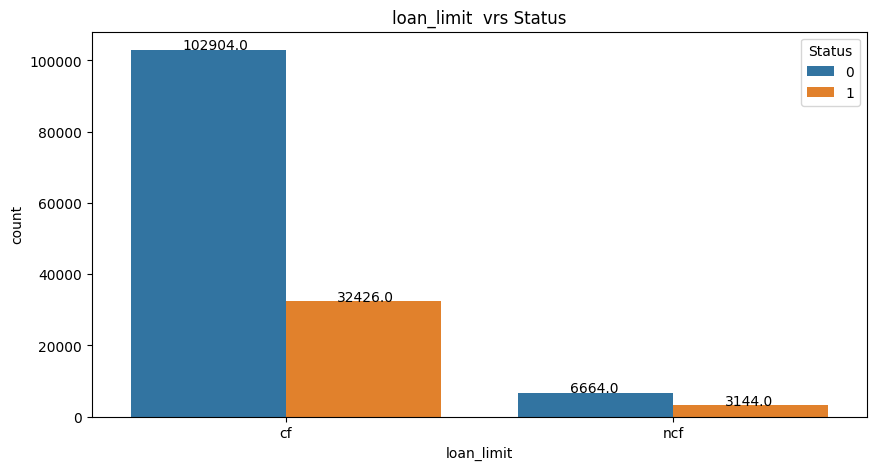

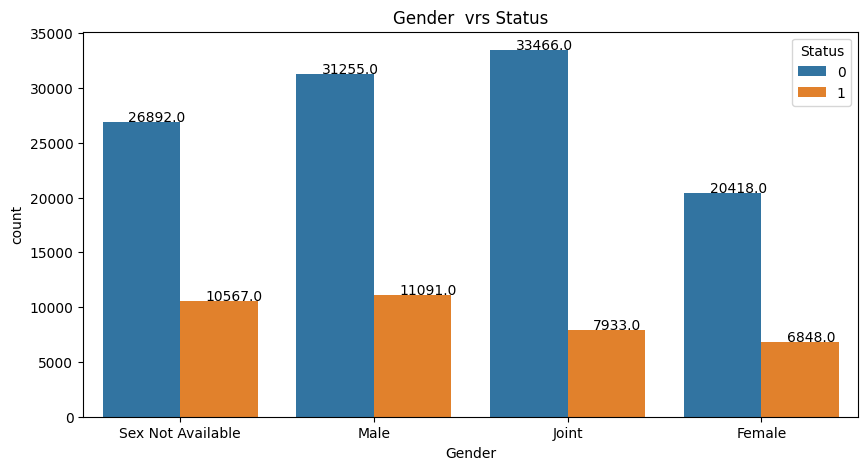

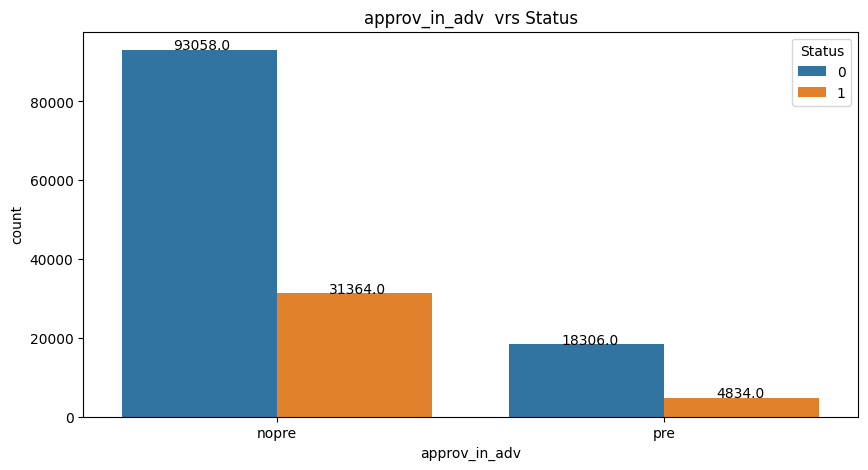

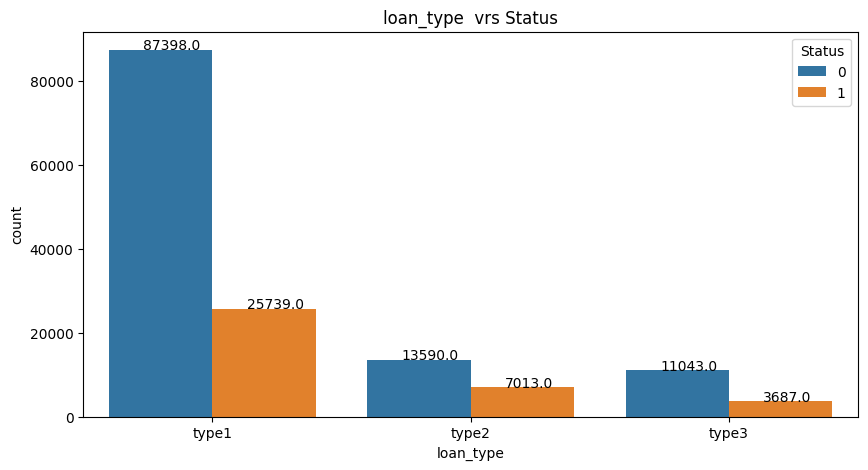

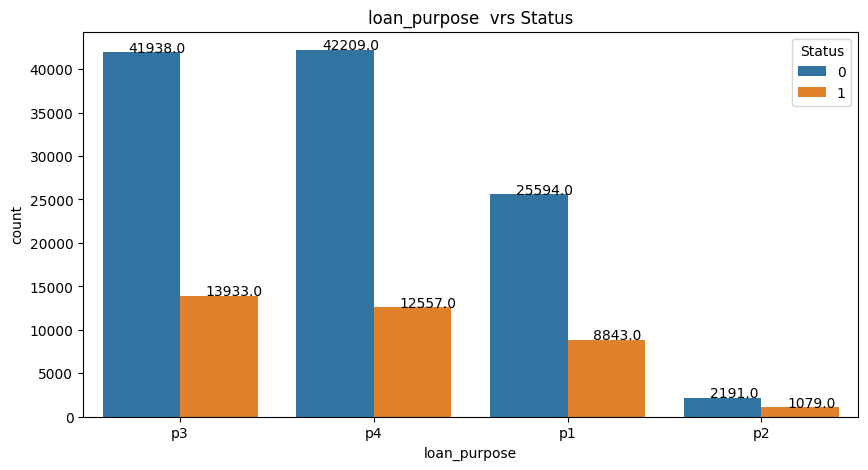

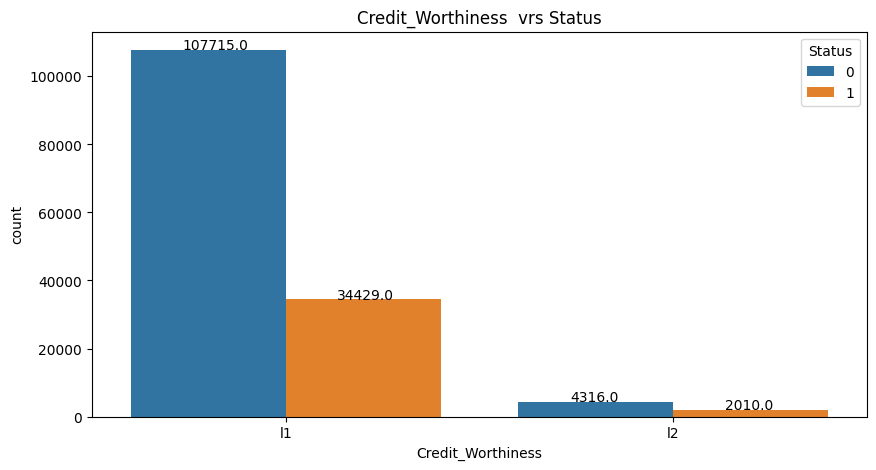

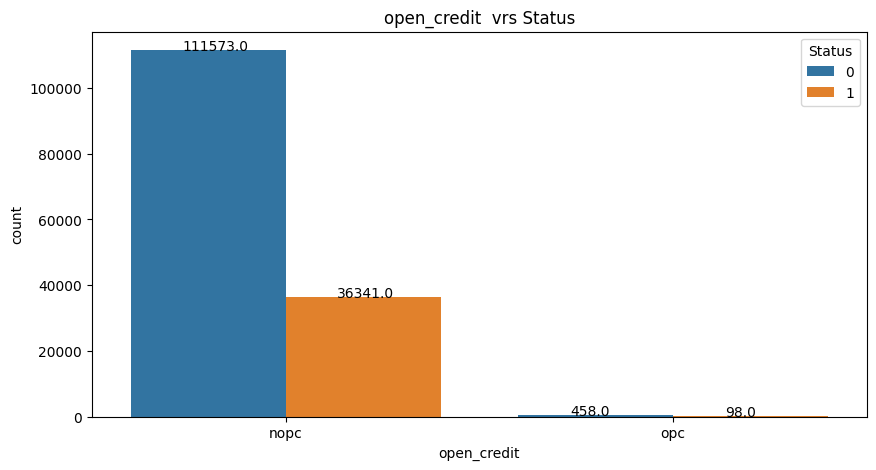

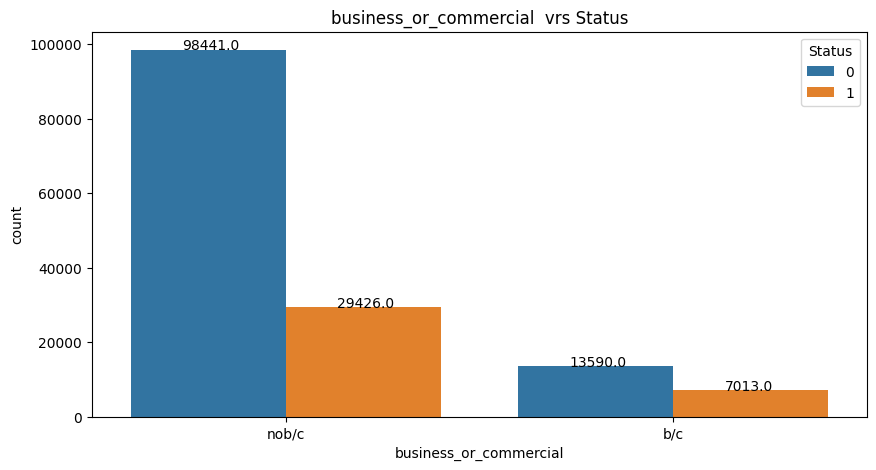

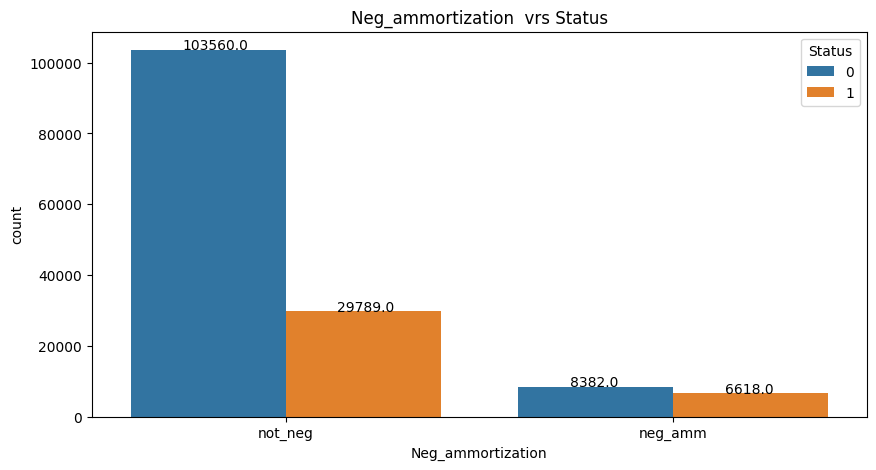

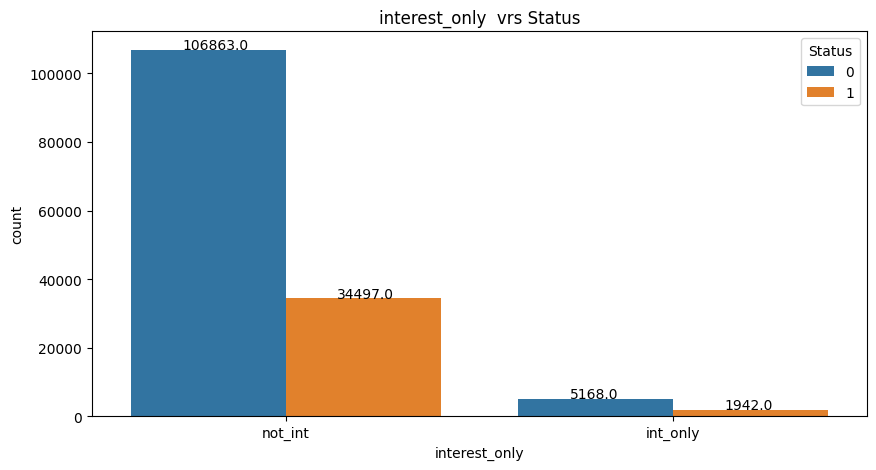

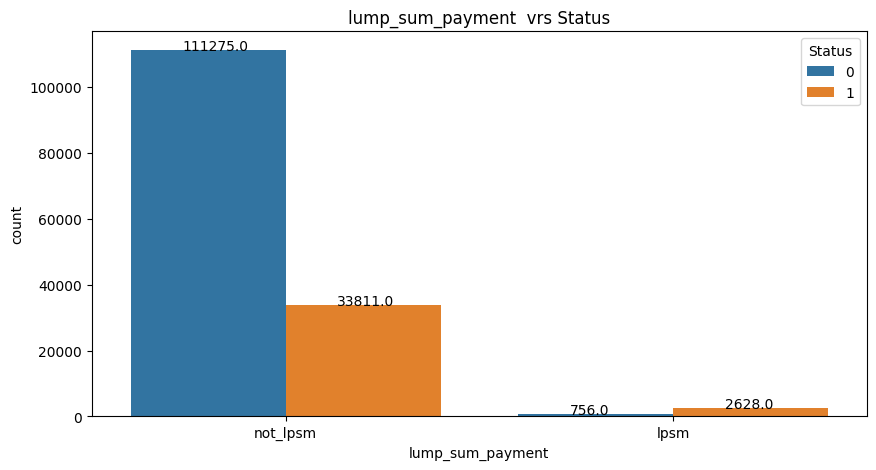

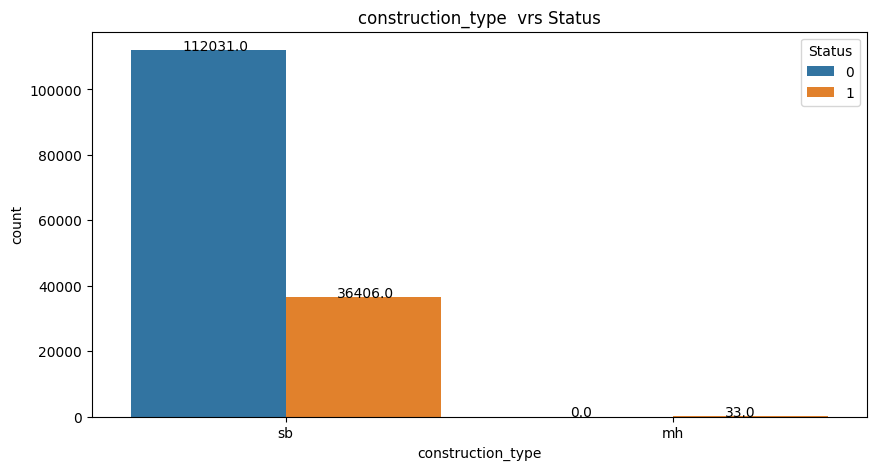

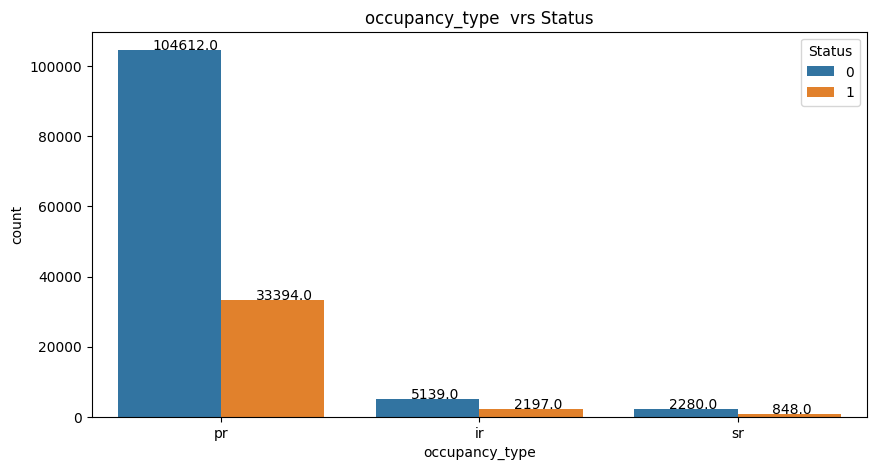

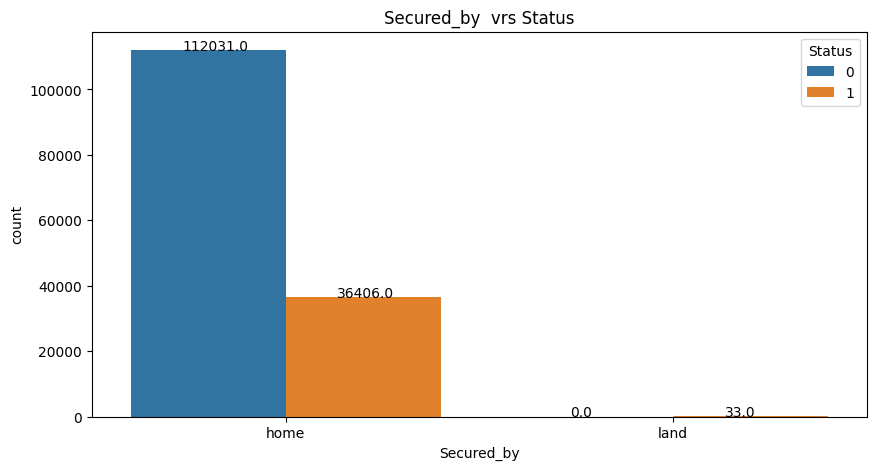

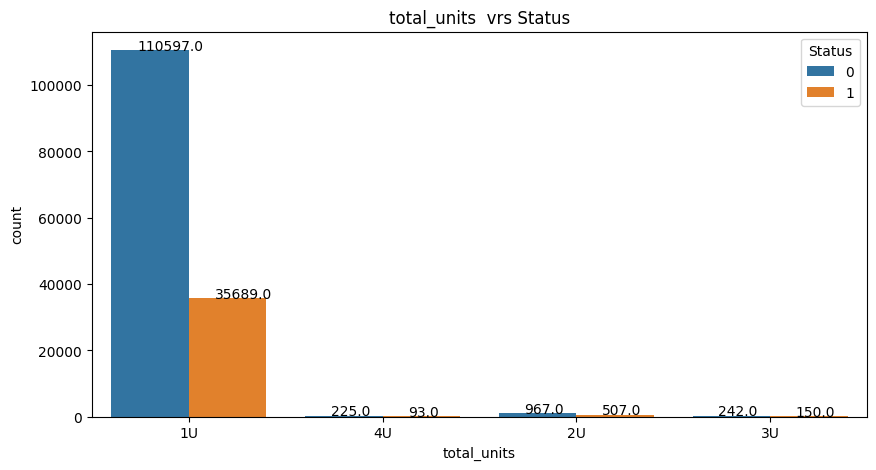

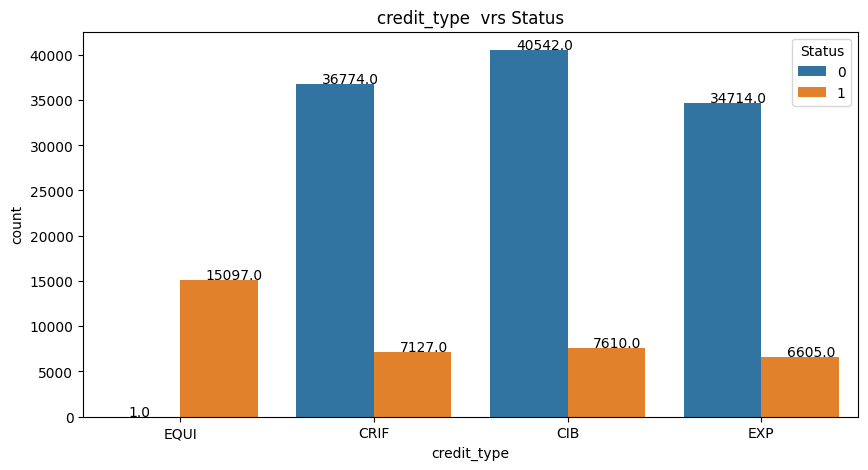

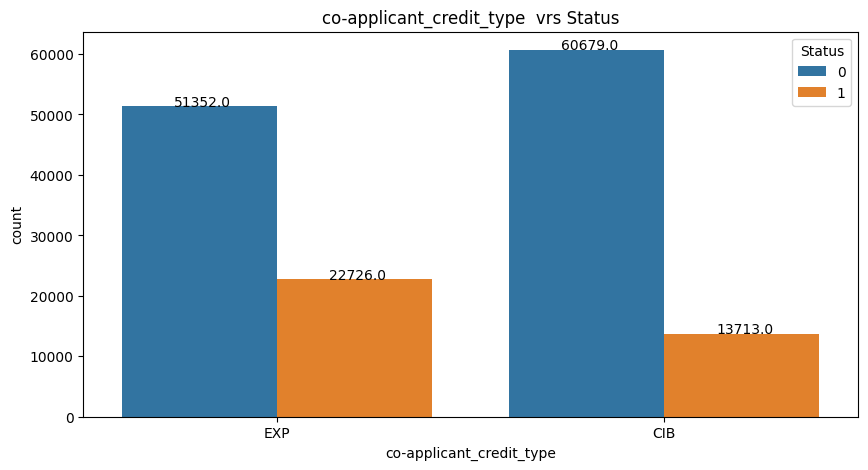

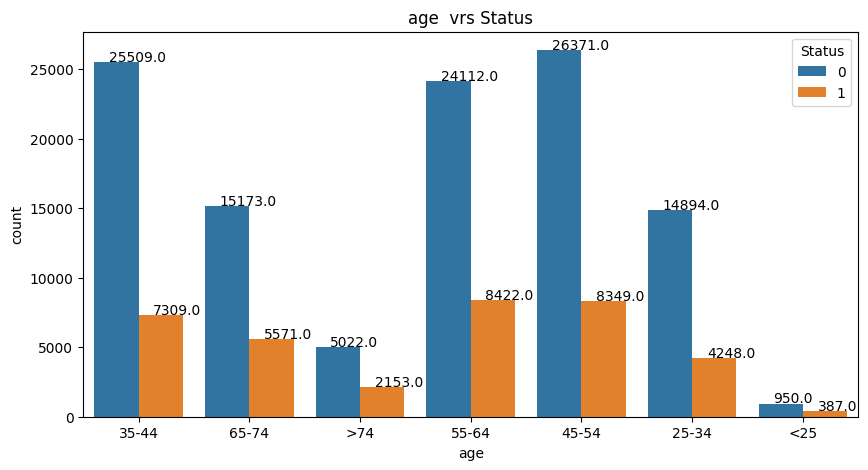

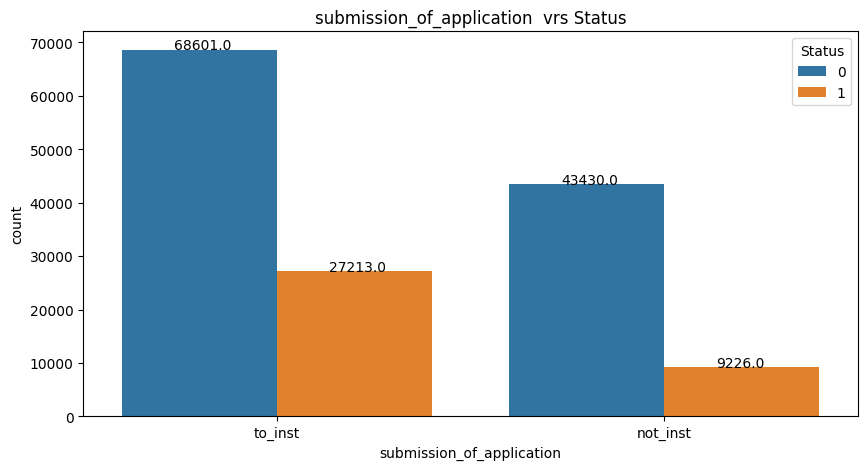

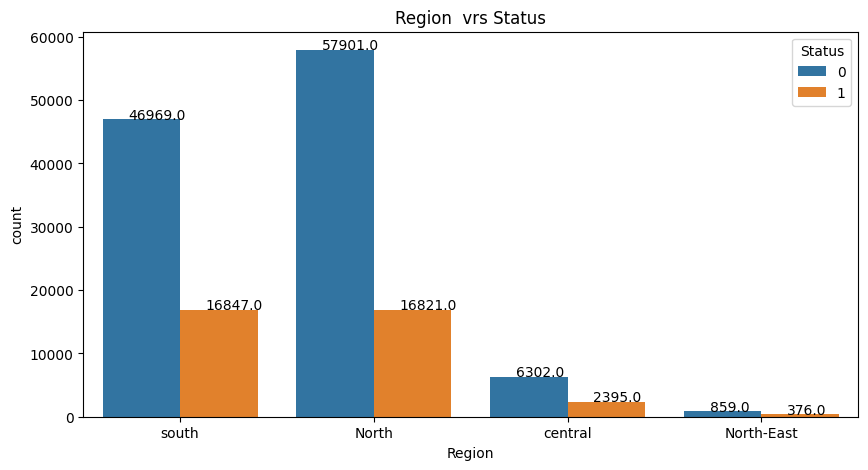

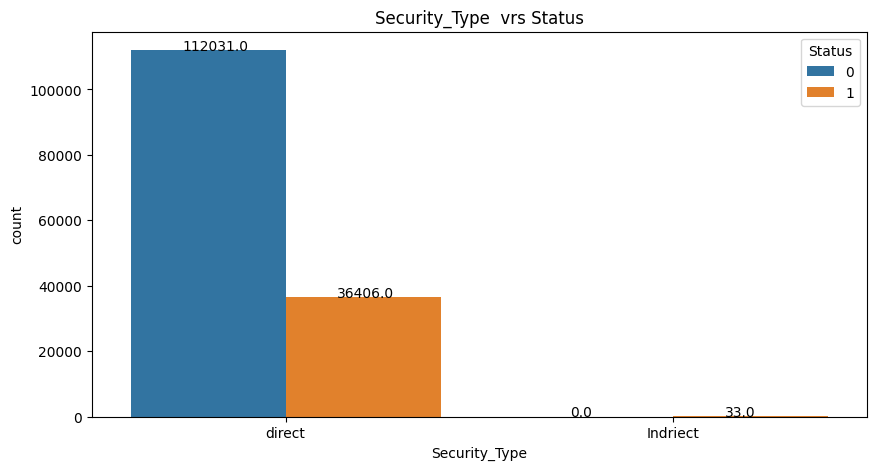

In [10]:
#Generamos la columna de barras con la columna de Categoria y la relacionamos con "Status"
for catCol in categoricas:
       plotCatColumn_vrs_Target(df, catCol, 'Status')

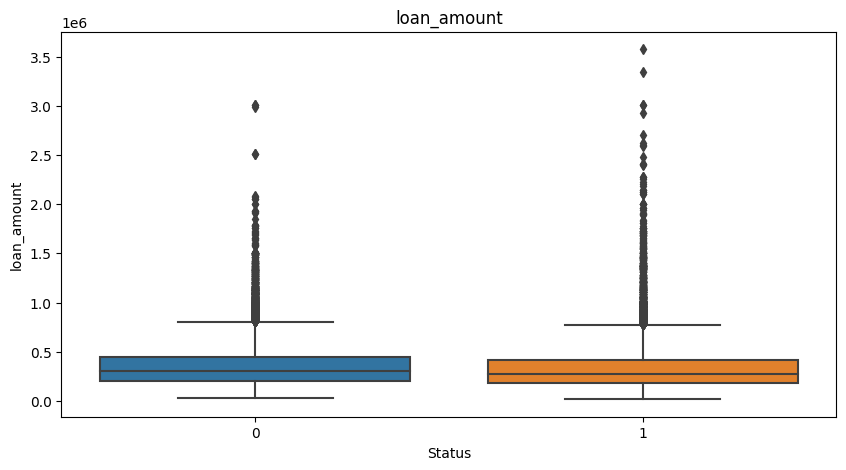

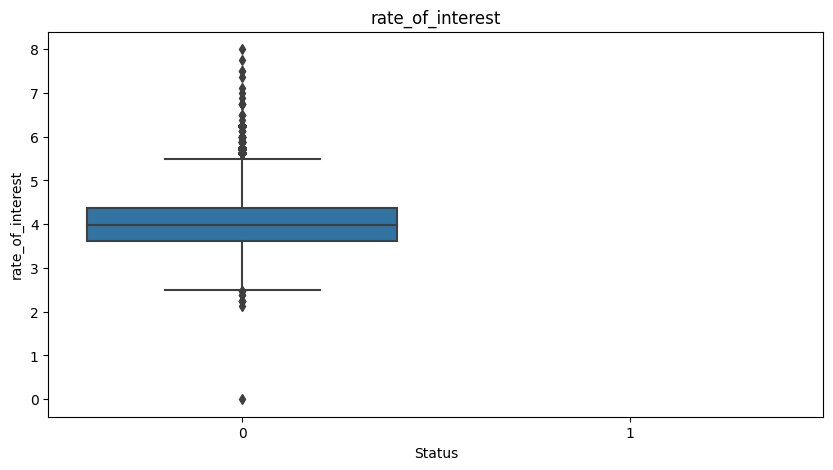

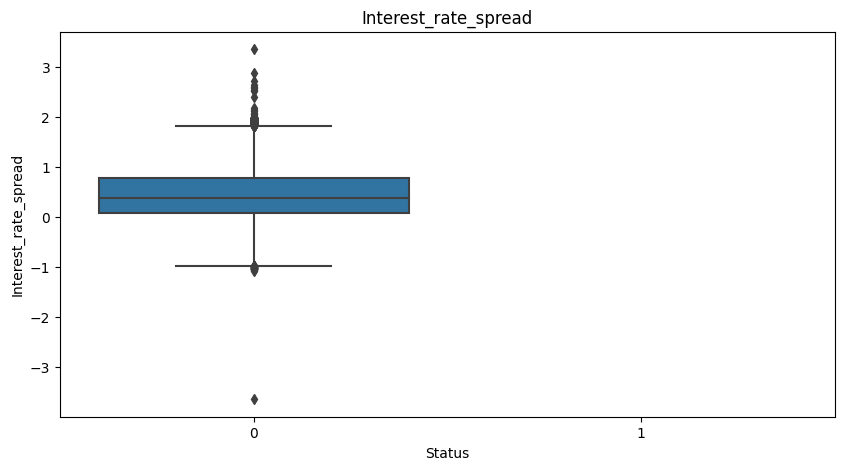

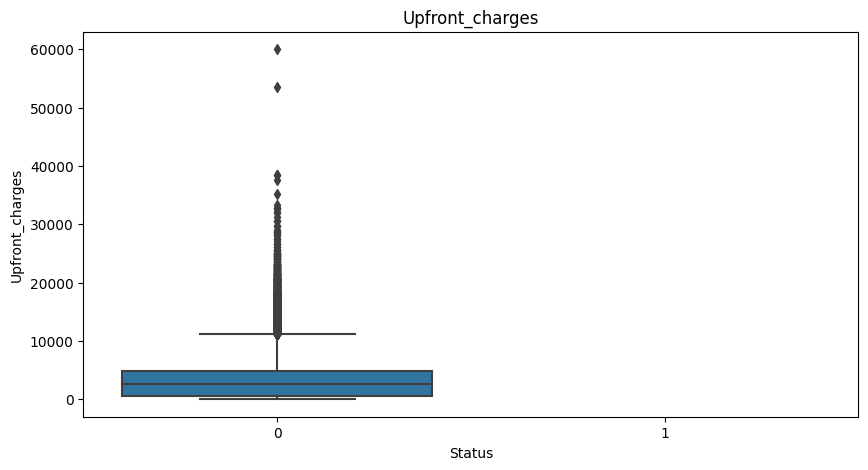

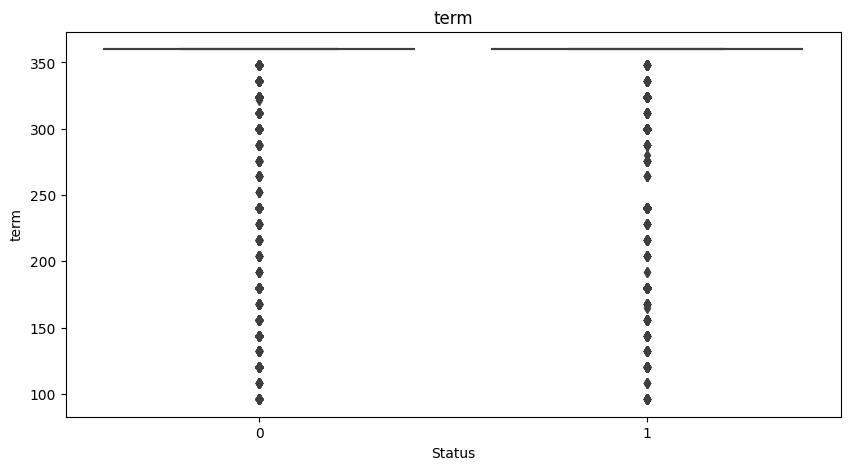

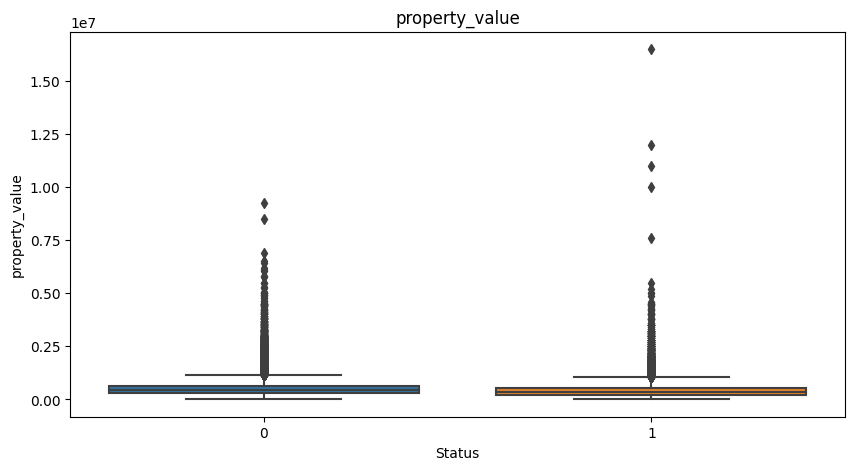

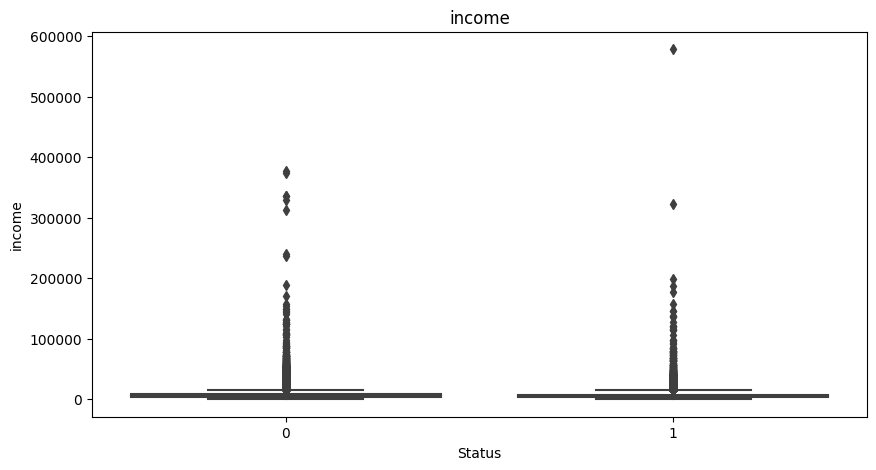

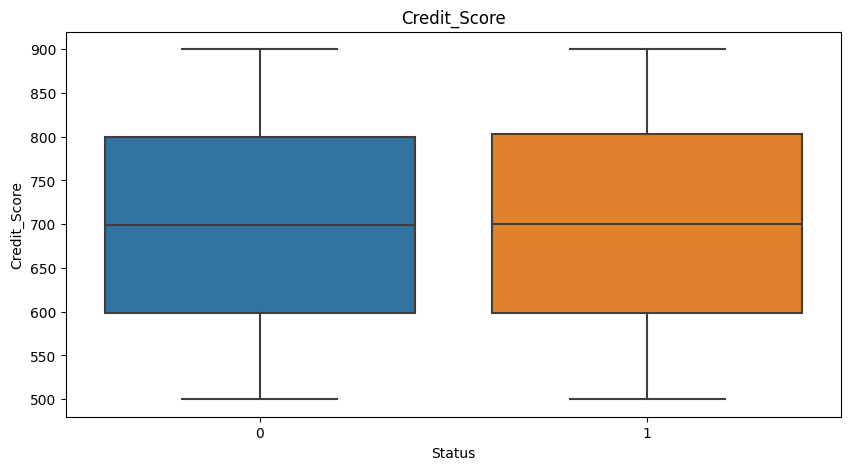

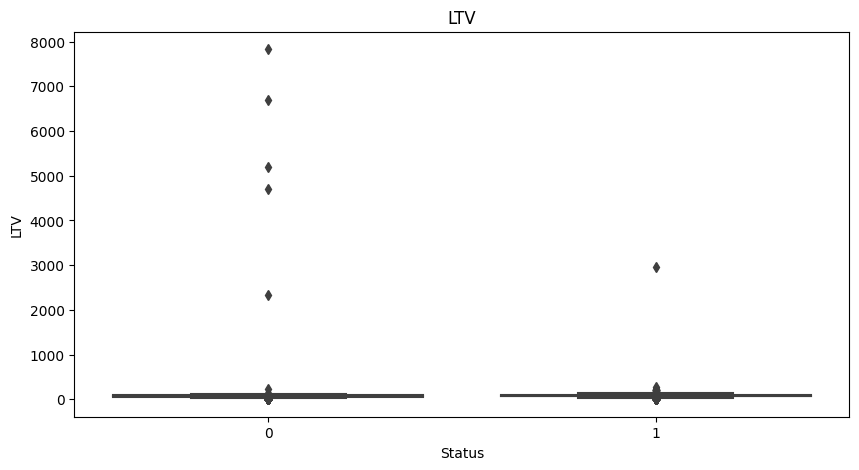

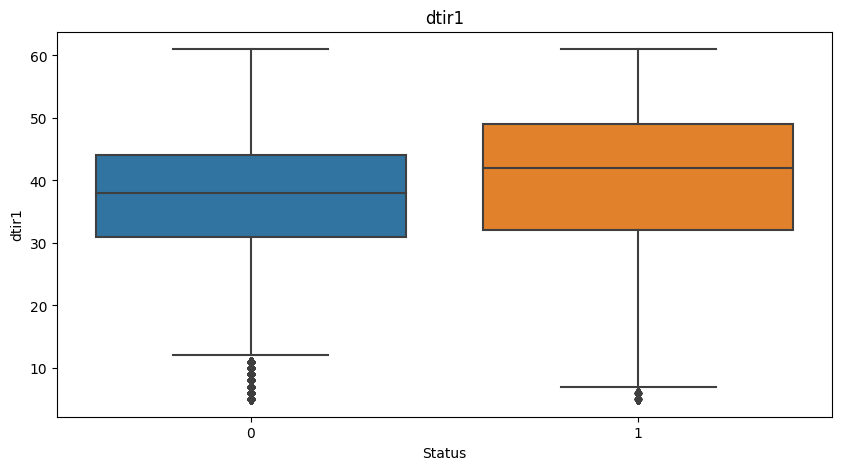

In [11]:
# Iteramos a través de las columnas continuas y creamos los gráficos de caja de igualmanera relacionandoslos con la columna "Status"
for colName in continuas:
       plt.figure(figsize=(10, 5))
       sns.boxplot(x=df['Status'], y=df[colName])
       plt.title(colName)
       plt.show()

### 2. Preparacion de los datos
#### Verificacion de los pesos de las clases.

In [12]:
# Calculamos el recuento de valores únicos en la columna 'Status' del DataFrame
# El resultado estará indicandonos la cantidad de veces que aparece cada valor único en la columna
df['Status'].value_counts()

0    112031
1     36439
Name: Status, dtype: int64

##### Vamos a igualar la relacion de los datos faltantes. en factor de 2 a 1 con la clase positiva.

In [13]:
# Creamos un nuevo DataFrame y filtramos las filas donde la columna 'Status' es igual a cero
df_aldia = df[df['Status'] == 0]
df_aldia.shape

(112031, 34)

In [14]:
# Creamos un nuevo DataFrame y filtramos las filas donde la columna 'Status' es igual a uno
df_incumplimiento = df[df['Status'] == 1]
df_incumplimiento.shape

(36439, 34)

In [15]:
# Calculamos la variable "cantidadAlDia" como el doble de la cantidad de filas en el DataFrame "df_incumplimiento" y dividido por 10
cantidadAlDia = int(2 * df_incumplimiento.shape[0])
cantidadAlDia

72878

In [16]:
#Seleccionamos un subconjunto del dataframe utilizando el metodo "Sample" donde "n" es la cantidad de filas a seleccionar
df_aldia = df_aldia.sample(n=cantidadAlDia, random_state=2023)

In [ ]:
# Ahora calculamos la variable "cantidadIncumple" como la mitad de "cantidadAlDia"
cantidadIncumple = int(cantidadAlDia / 2)
cantidadIncumple

In [18]:
#Seleccionamos un subconjunto aleatorio de filas del DataFrame "df_incumplimiento" utilizando el método "sample"
# donde "n" es la cantidad de filas a seleccionar el cual se basa en el valor previamente calculado "cantidadIncumple"
df_incumplimiento = df_incumplimiento.sample(n=cantidadIncumple, random_state=2023)

In [19]:
# Concatenamos los DataFrames en un solo DataFrame.
df = pd.concat([df_incumplimiento, df_aldia])
df.shape

(109317, 34)

### Ingeniería de Características

##### Imputación de Variables
##### Verificamos la cantidad de faltantes en cada columna del Data Set

In [20]:
# Calculamos la proporción de valores nulos (NaN) en cada columna del DataFrame
df.isnull().mean() #porcentaje

ID                           0.000000
year                         0.000000
loan_limit                   0.022513
Gender                       0.000000
approv_in_adv                0.006019
loan_type                    0.000000
loan_purpose                 0.000887
Credit_Worthiness            0.000000
open_credit                  0.000000
business_or_commercial       0.000000
loan_amount                  0.000000
rate_of_interest             0.333333
Interest_rate_spread         0.333333
Upfront_charges              0.352050
term                         0.000293
Neg_ammortization            0.000787
interest_only                0.000000
lump_sum_payment             0.000000
property_value               0.138103
construction_type            0.000000
occupancy_type               0.000000
Secured_by                   0.000000
total_units                  0.000000
income                       0.056807
credit_type                  0.000000
Credit_Score                 0.000000
co-applicant

##### Agrupamos las columnas con NA

In [68]:
# Creamos una lista 'cols_con_na' que contiene los nombres de las columnas del DataFrame, los cuales tienen valores nulos de "NaN" en alguna de sus filas
cols_con_na = [col for col in df.columns if (df[col].isnull().mean() > 0)]
cols_con_na

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

##### Verificamos los tipos para analizar las estrategias a utilizar

In [22]:
# Mostramos la lista de nombres de columnas con valores nulos
df[cols_con_na].dtypes

loan_limit               object
approv_in_adv            object
loan_purpose             object
rate_of_interest        float64
Interest_rate_spread    float64
Upfront_charges         float64
term                    float64
Neg_ammortization        object
property_value          float64
income                  float64
LTV                     float64
dtir1                   float64
dtype: object

##### Verificamos el % de faltantes

In [23]:
# Calculamos la proporción de valores nulos
prop_nan_per_col = df[cols_con_na].isnull().mean()
prop_nan_per_col

loan_limit              0.022513
approv_in_adv           0.006019
loan_purpose            0.000887
rate_of_interest        0.333333
Interest_rate_spread    0.333333
Upfront_charges         0.352050
term                    0.000293
Neg_ammortization       0.000787
property_value          0.138103
income                  0.056807
LTV                     0.138103
dtir1                   0.193995
dtype: float64

#####  Se procede a tratar de rescatar las variables que están por debajo de o igual a 0.05


In [24]:
# Creamos una lista "cols_a_imputar" que contiene los nombres de las columnas en la lista "cols_con_na"
# del DataFrame "df" donde la proporción de valores nulos es igual o inferior al 5%
cols_a_imputar = [col for col in cols_con_na if (df[col].isnull().mean() <= 0.05)]
cols_a_imputar

['loan_limit', 'approv_in_adv', 'loan_purpose', 'term', 'Neg_ammortization']

In [25]:
# Mostramos los tipos de datos de las columnas contenidas en la lista
df[cols_a_imputar].dtypes

loan_limit            object
approv_in_adv         object
loan_purpose          object
term                 float64
Neg_ammortization     object
dtype: object

##### Imputación Continua

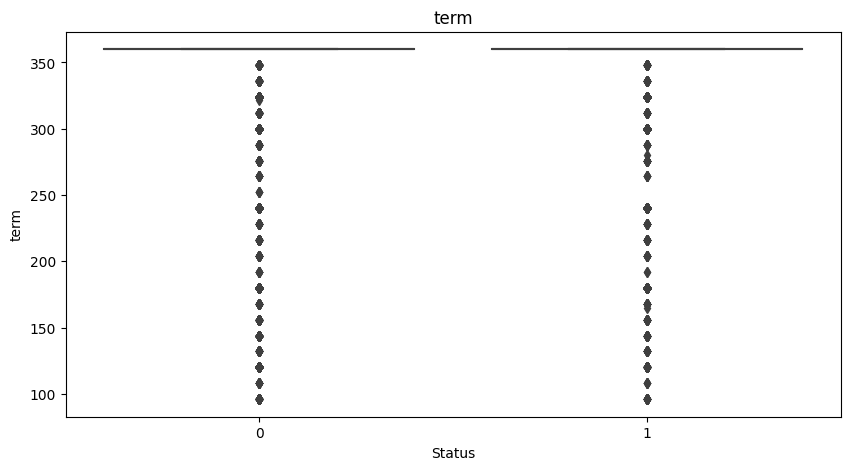

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Status'], y=df['term'])
plt.title('term')
plt.show()

#####  Debido a que la variable term se examinó en la exploración que no aporta de una manera significativa se descarta la variable. La concentracion de los datos esta al mismo nivel.

##### Imputación Categórica

In [27]:
# Seleccionamos las columnas categóricas 
# Mostramos las primeras filas del nuevo DataFrame para visualizar los datos.
dataset_cat_missing = df[['Status','loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization']]
dataset_cat_missing.head()

,Status,loan_limit,approv_in_adv,loan_purpose,Neg_ammortization
21887,1,ncf,nopre,p4,not_neg
31962,1,cf,nopre,p4,not_neg
20422,1,cf,nopre,p1,not_neg
10648,1,ncf,nopre,p3,not_neg
4482,1,cf,nopre,p3,not_neg


In [28]:
# Procedemos a Calcular la proporción de valores nulos en cada columna
dataset_cat_missing.isnull().mean()

Status               0.000000
loan_limit           0.022513
approv_in_adv        0.006019
loan_purpose         0.000887
Neg_ammortization    0.000787
dtype: float64

In [29]:
# Iteramos a través de las columnas categóricas
for columna in ['loan_limit', 'approv_in_adv','loan_purpose','Neg_ammortization']:
    # Calculamos la proporción de cada categoría en la columna actual dividiendo su conteo por la longitud del DataFrame.
    result = dataset_cat_missing[columna].value_counts() / len(dataset_cat_missing)
    print(result)

cf     0.908047
ncf    0.069440
Name: loan_limit, dtype: float64
nopre    0.839824
pre      0.154157
Name: approv_in_adv, dtype: float64
p3    0.378102
p4    0.366119
p1    0.231913
p2    0.022979
Name: loan_purpose, dtype: float64
not_neg    0.888828
neg_amm    0.110385
Name: Neg_ammortization, dtype: float64


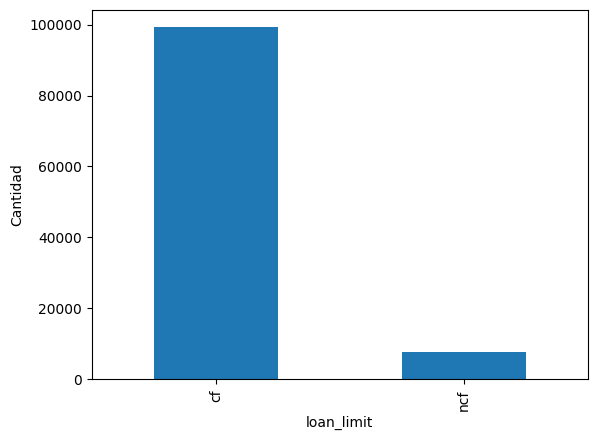

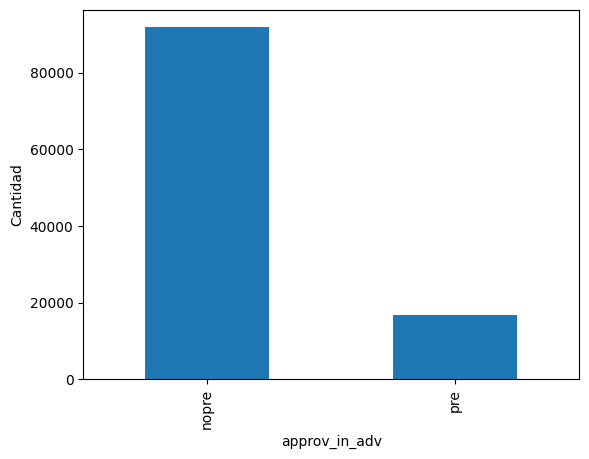

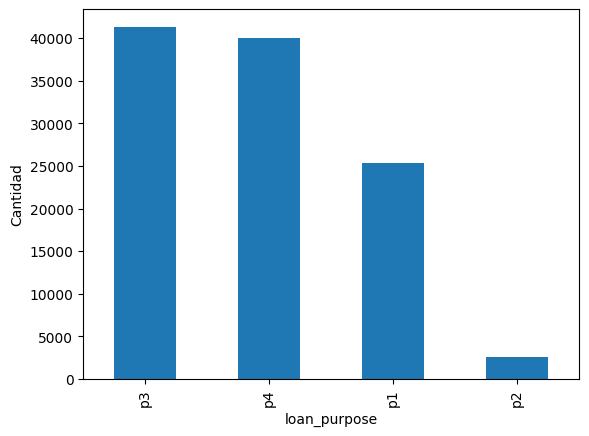

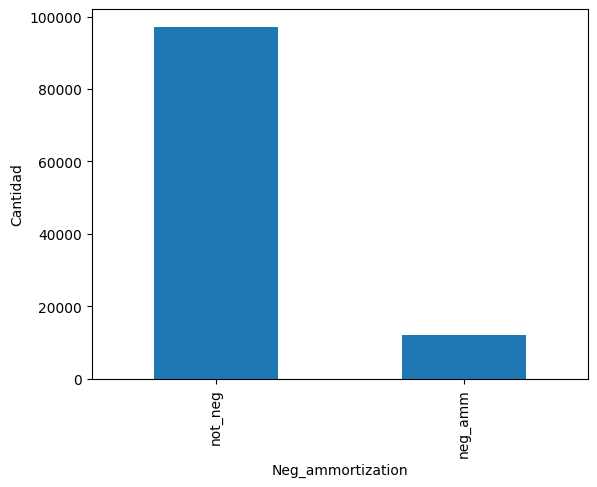

In [30]:
# Iteramos a través de las columnas categóricas
for columna in ['loan_limit', 'approv_in_adv','loan_purpose','Neg_ammortization']:
    # Utilizamos "value_counts()" para contar las ocurrencias de cada categoría en la columna actual
    dataset_cat_missing[columna].value_counts().plot.bar()
    plt.ylabel("Cantidad")
    plt.xlabel(columna)
    plt.show()

In [31]:

def plotCatColumn_vrs_Target(df, colname, target):
    # Obtiene las categorías únicas de la columna 'colname' y va eliminando valores nulos si existieran
    categories = df[colname].unique()
    categories = [category for category in categories if pd.notnull(category)]
    #Usamos una lista de colores para el grafico KDE
    colors = ['yellow', 'blue', 'green', 'red', 'orange', 'purple', 'pink', 'brown', 'gray', 'teal']
    
    #Creamos el grafico
    fig = plt.figure()
    ax = fig.add_subplot(111)

    subset_missing = df[df[colname].isnull()]
    if not subset_missing.empty:
        subset_missing[target].plot(kind="kde", color="black", label="Missings")

    for i, category in enumerate(categories):
        subset = df[df[colname] == category]
        subset[target].plot(kind="kde", color=colors[i], label=category)

    ax.legend()
    plt.title(f'{colname} vs {target}')
    plt.show()


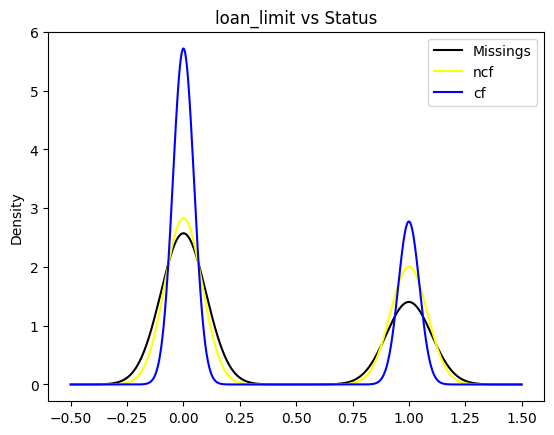

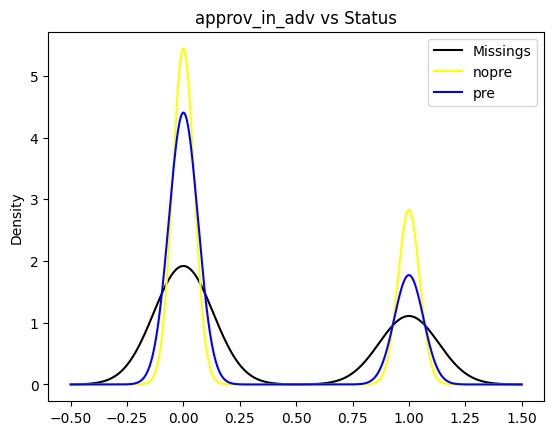

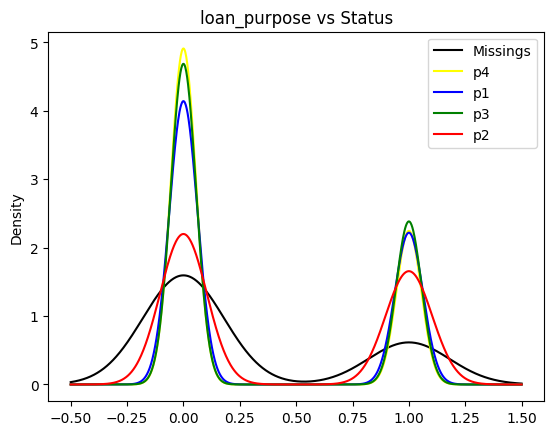

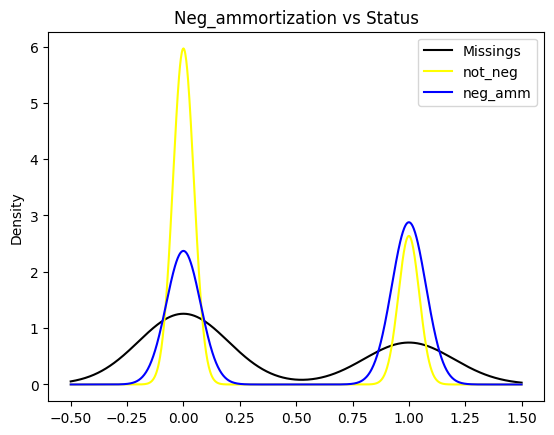

In [32]:
#Procedemos a iterar y generar los graficos 
for catCol in  ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization']:
    plotCatColumn_vrs_Target(dataset_cat_missing, catCol, 'Status')

In [33]:
df['loan_limit'].fillna('ncf', inplace=True)
df['approv_in_adv'].fillna('pre', inplace=True)
df['loan_purpose'].fillna('p2', inplace=True)
df['Neg_ammortization'].fillna('not_neg', inplace=True)

##### Verificación de la densidad despues de las imputaciones.

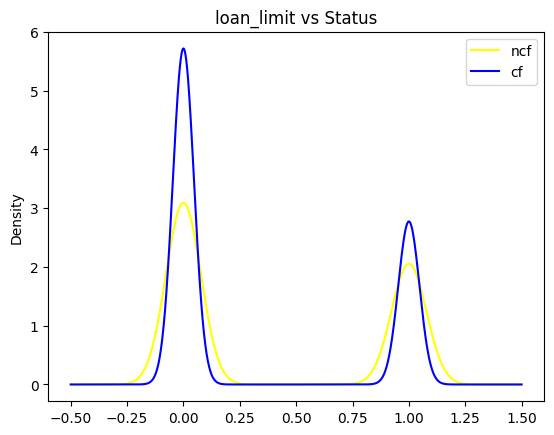

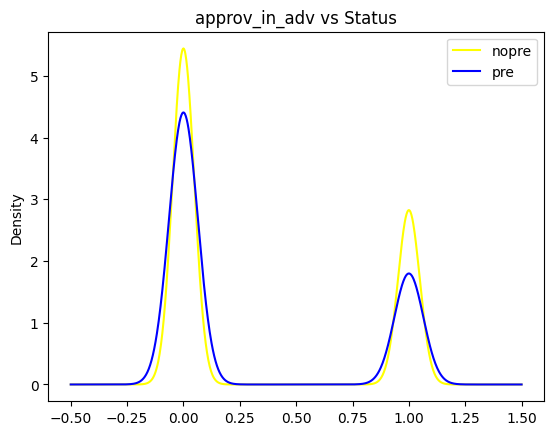

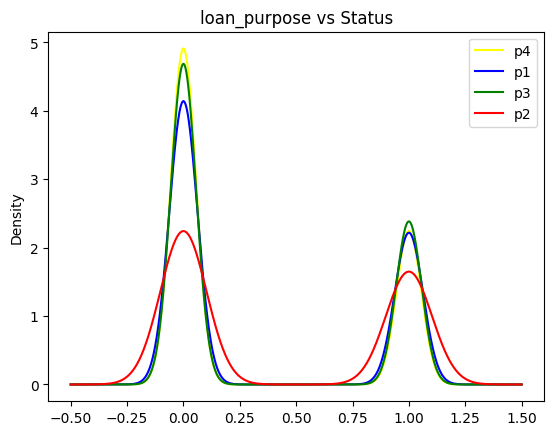

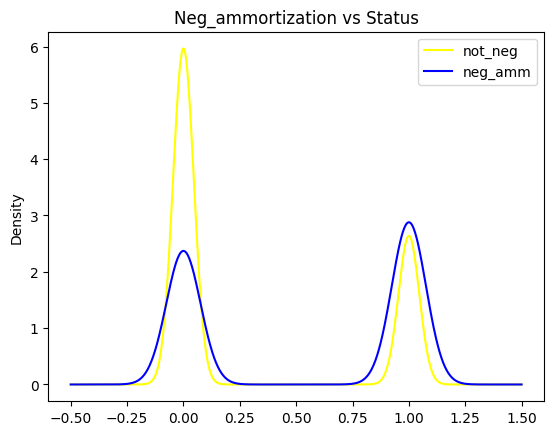

In [34]:
for catCol in  ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization']:
    plotCatColumn_vrs_Target(df, catCol, 'Status')

##### La modificación fue casi imperceptible, las gráficas mantienen su misma forma.

In [35]:
#Creamos la lista de sobrevivientes que contiene el nombe de las columnas con una proporción de valores nulos igual o menor al 5%
Sobrevivientes = [col for col in df if (df[col].isnull().mean() <= 0.05)]
Sobrevivientes.remove('ID') #Identificador del caso
Sobrevivientes.remove('year') #Año todo es 2019
Sobrevivientes.remove('term') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes.remove('Credit_Score') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes


['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type',
 'Status']

##### Codificación de Variables Categóricas

In [36]:
# Mostramos los tipos de datos de las columnas contenidas en la lista "Sobrevivientes"
df[Sobrevivientes].dtypes


loan_limit                   object
Gender                       object
approv_in_adv                object
loan_type                    object
loan_purpose                 object
Credit_Worthiness            object
open_credit                  object
business_or_commercial       object
loan_amount                   int64
Neg_ammortization            object
interest_only                object
lump_sum_payment             object
construction_type            object
occupancy_type               object
Secured_by                   object
total_units                  object
credit_type                  object
co-applicant_credit_type     object
age                          object
submission_of_application    object
Region                       object
Security_Type                object
Status                        int64
dtype: object

In [37]:
# Crea una lista llamada 'codificar' que contiene los nombres de las columnas 'loan_amount' y 'Status'
codificar = Sobrevivientes
codificar.remove('loan_amount') #Continua
codificar.remove('Status') #Objetivo
codificar

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

##### Codificación de Variables Categóricas para esta codificacion usaremos codificación por frecuencia.

In [38]:
#Iteramos a través de las columnas especificadas en la lista "codificar"
for catCol in codificar:
              # Crea un diccionario que mapea los valores únicos de la columna a su frecuencia en esa columna
              freq_encoder_dict = df[catCol].value_counts().to_dict()
              df[catCol] = df[catCol].map(freq_encoder_dict)

In [39]:
# Crea una lista 'Sobrevivientes' que contiene los nombres de las columnas con una proporción de valores nulos igual o menor al 5%
Sobrevivientes = [col for col in df if (df[col].isnull().mean() <= 0.05)]
Sobrevivientes.remove('ID') #Identificador del caso
Sobrevivientes.remove('year') #Año todo es 2019
Sobrevivientes.remove('term') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes.remove('Credit_Score') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type',
 'Status']

In [40]:
# Muestra los tipos de datos de las columnas en la lista "Sobrevivientes"
df[Sobrevivientes].dtypes

loan_limit                   int64
Gender                       int64
approv_in_adv                int64
loan_type                    int64
loan_purpose                 int64
Credit_Worthiness            int64
open_credit                  int64
business_or_commercial       int64
loan_amount                  int64
Neg_ammortization            int64
interest_only                int64
lump_sum_payment             int64
construction_type            int64
occupancy_type               int64
Secured_by                   int64
total_units                  int64
credit_type                  int64
co-applicant_credit_type     int64
age                          int64
submission_of_application    int64
Region                       int64
Security_Type                int64
Status                       int64
dtype: object

In [41]:
#Desplegamos el dataframe para visualizar los datos
df[Sobrevivientes]

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,Neg_ammortization,...,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
21887,10052,20054,91807,10881,40023,104461,108905,93472,906500,97250,...,101439,109284,107634,31048,53097,15319,37410,54445,109284,1
31962,99265,28068,91807,82591,40023,104461,108905,93472,216500,97250,...,101439,109284,107634,29247,56220,25490,71907,47392,109284,1
20422,99265,29710,91807,82591,25352,104461,108905,93472,136500,97250,...,5543,109284,107634,33924,56220,25490,37410,54445,109284,1
10648,10052,31485,91807,10881,41333,104461,108905,93472,536500,97250,...,101439,109284,107634,15098,56220,24293,71907,54445,109284,1
4482,99265,28068,91807,10881,41333,104461,108905,93472,226500,97250,...,101439,109284,107634,15098,56220,15319,71907,47392,109284,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60993,10052,28068,91807,82591,41333,104461,108905,93472,576500,97250,...,101439,109284,107634,33924,53097,24293,71907,47392,109284,0
54338,99265,29710,91807,82591,40023,104461,108905,93472,576500,97250,...,101439,109284,107634,31048,56220,24293,37410,6552,109284,0
69755,99265,31485,91807,82591,41333,104461,108905,93472,236500,97250,...,101439,109284,107634,33924,53097,23914,71907,54445,109284,0
64436,99265,28068,91807,82591,40023,104461,108905,93472,156500,97250,...,101439,109284,107634,31048,53097,24293,37410,47392,109284,0


##### Outliers

In [42]:
# Importamos el módulo 'scipy.stats' que proporciona funciones y distribuciones estadísticas en SciPy.
import scipy.stats as stats

In [43]:

def plotDistBoxQQ(dataset, col):
     '''
     Descripcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers
     Input: dataset-> pandas dataframe, col->string con nombre de columna
     output: visualiuzación de plots.
     '''
     # Creamos una figura con tres subplots
     plt.figure(figsize=(20, 6))
     plt.subplot(1, 3, 1)
     sns.distplot(dataset[col], bins=30)
     # Generamos un histograma y densidad de la columna "col" usando Seaborn
     plt.title("Histograma y Densisdad")

     plt.subplot(1, 3, 2)
     sns.boxplot(y=dataset[col])
     # Generamos un gráfico de caja
     plt.title("Boxplot")

     plt.subplot(1, 3, 3)
     stats.probplot(dataset[col], dist="norm", plot=plt)
     plt.title("Q-Q Plot")

<ipython-input-43-3cccf1945f61>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


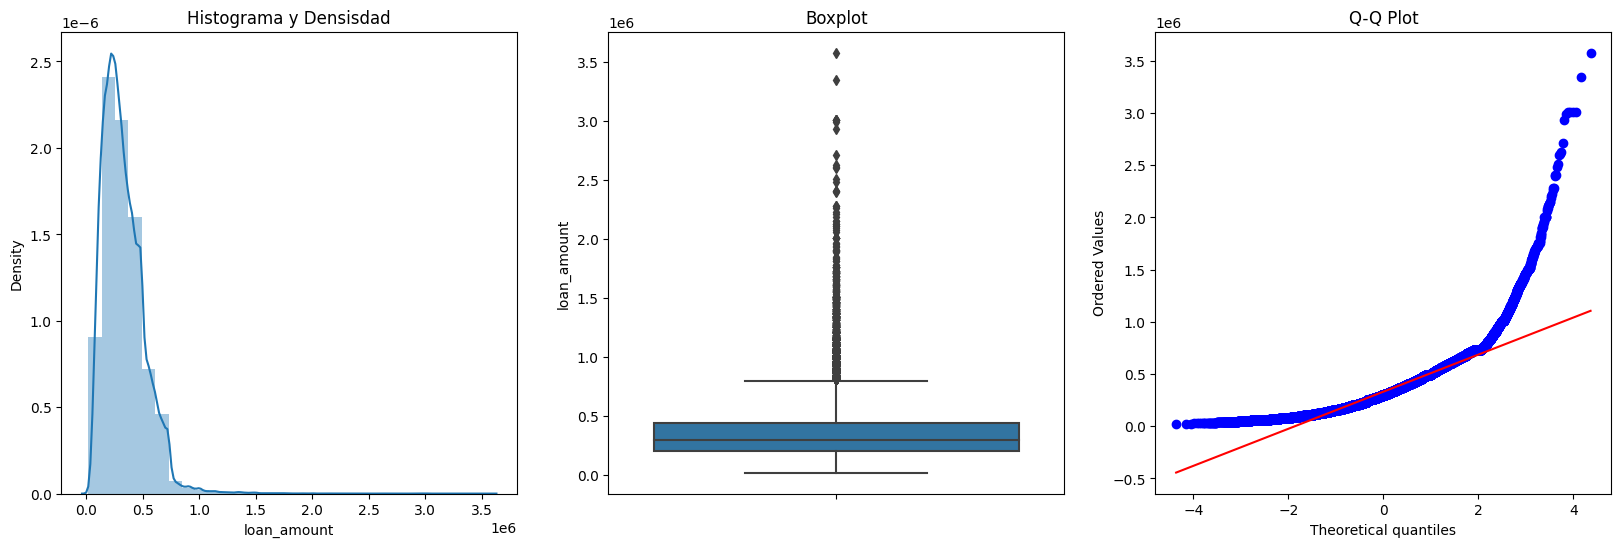

In [44]:
# Iteramos a través de la lista de columna
for col in ['loan_amount']:
# Ahora llamamos a la función 'plotDistBoxQQ' para generar los gráficos de Distribución, Boxplot y Q-Q Plot
     plotDistBoxQQ(df, col)

##### Porcedemos a tratar los outliers

In [45]:
def detectOutliersLimits(dataset, col):
     '''
     Descripción: Calcula los limites superiores e inferiores para detección de outliers.
     Input: dataset-> pandas dataframe, col -> string nombre de columna
     Output: tupla de floats con los limites superior e inferior
     '''
     #Calculamos el rango intercuartil de la columna "col"
     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     #Calculamos el límite inferior restando 1.75 veces al primer cuartil
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     #Calculamos el límite superior sumando 1.75 veces al tercer cuartil 
     LS = dataset[col].quantile(0.75) + (IQR*1.75)

     return LI, LS

In [47]:
#Utilizamos la función 'detectOutliersLimits' para calcular los límites superior e inferior
LI, LS = detectOutliersLimits(df, 'loan_amount')
LI, LS

(-223500.0, 856500.0)

In [48]:
# Calcula los límites superior e inferior para detectar valores atípicos en la columna 'Age'
LI, LS = detectOutliersLimits(df, 'loan_amount')
# Reemplaza los valores en la columna 'Age' que son mayores que el límite superior (LS) por el propio límite superior (LS).
df['loan_amount'] = np.where(df['loan_amount']  > LS, LS,
                                                                       np.where(df['loan_amount']  < LI, LI, df['loan_amount'] ))

<ipython-input-43-3cccf1945f61>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


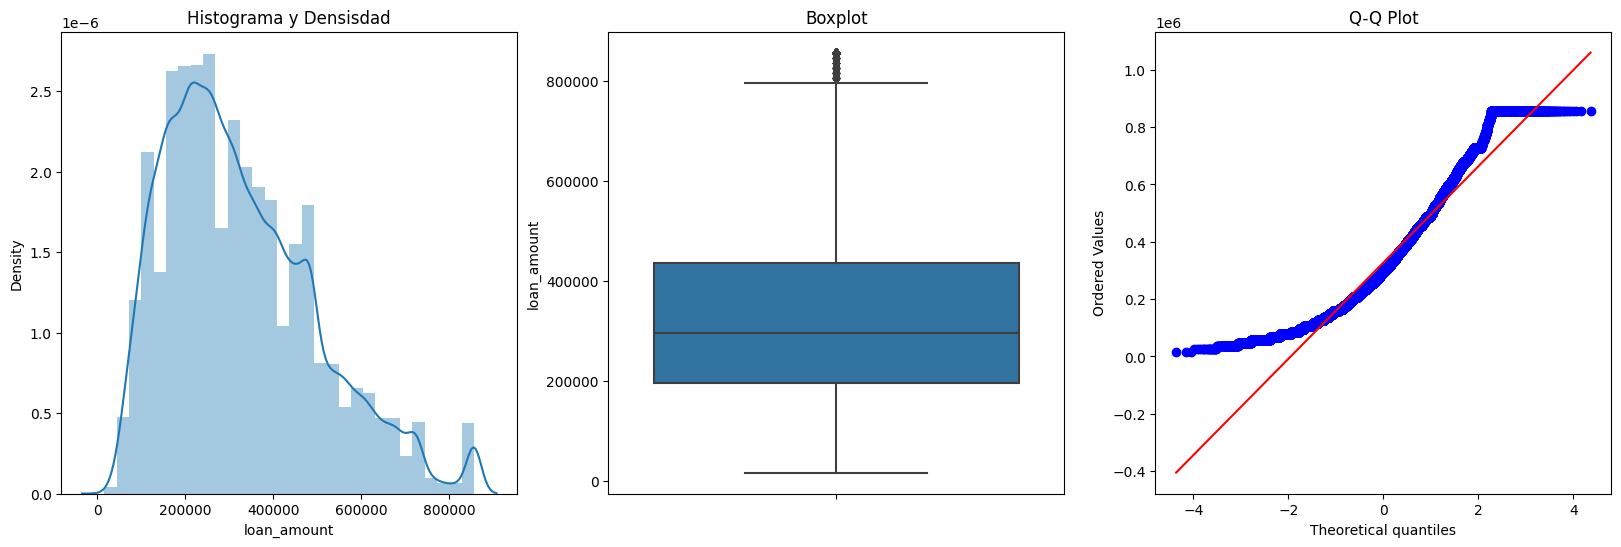

In [49]:
# Utilizamos la función 'plotDistBoxQQ' para generar gráficos de Distribución, Boxplot y Q-Q Plot
plotDistBoxQQ(df, 'loan_amount')

#### Con esta modificación nuestra variable queda con una mejor distribución. Y ofréceme mejores datos, el boxplot es mas entendible gracias al Método del Rango Intercuartil (IQR):.

In [50]:
## Importamos el módulo StandardScaler de scikit-learn para la estandarización de características
from sklearn.preprocessing import StandardScaler
# Importamos la función train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
##from summarytools import dfSummary
from sklearn.preprocessing import LabelEncoder
# Importamos TensorFlow y Keras, que son bibliotecas populares para el aprendizaje profundo
import tensorflow as tf
import tensorflow.keras as kr
# Importamos las clases Sequential, Dense y Dropout de Keras para construir modelos de redes neuronales
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout



In [ ]:

#Resumen estadístico
dfSummary(df[Sobrevivientes])


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,loan_limit[int64],Mean (sd) : 9054.4 (2594.8)min < med < max:1036.0 < 9894.0 < 9894.0IQR (CV) : 0.0 (3.5),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtUlEQVR4nO3XS4qDQBRG4XsbEZ1UIYKLcRFZbBbhbiSUgyiBpHrWk6bzqKRJ/835pnovNTj48JyzAX/dx7sPANyjevcB8H+4e2tmdeH4Kee8/nSRUPES7t72fb8LIXQl88uyHNx9/1OshIpXqUMI3TiOa4xxe2QwpdRM09TN81ybGaHi98UYt2EYjgWj7bWL/ExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCQnXrBndvzawu3H/KOa+Fs8CXq6G6e9v3/S6E0JUsX5bl4O57YsWzbj1R6xBCN47jGmPcHlmcUmqmaermea7NjFDxlJuvfjOzGOM2DMOxYH9bMAN8w88UJBAqJBAqJNz1jZpSah5dnFJqzudzZWbB3R8+GOSEy+VSlbZy655P3mhOfcJbnkcAAAAASUVORK5CYII="">",0(0.0%)
2,Gender[int64],Mean (sd) : 2793.4 (369.1)min < med < max:2035.0 < 2955.0 < 3062.0IQR (CV) : 184.0 (7.6),4 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB7ElEQVR4nO3dTWrCUBSG4XObVKLCDSLozCV04NBFdLFdhIsRRK6YKpGYDkrBkea3+uH7zG8M+CJE8RxXlqUBz+7t0TcAVBE/+gbwPJxzQzMbtLhEXpblsav7uUaoMLPfSKfT6af3ftL0Gvv9fuec++ojVkLFn4H3frJarY5pmp7qHg4hJOv1erLdbgdmRqjoV5qmp9ls9t3w+LDTm7nCwxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokMCQNnSmK4t3MvHOuyfGbs1UJFZ3Isuz9fD5/LBaLKIqi2mMr781WJVR0Is/zOEmS0XK5PM3n812ds1VmqxIqOjUej5vOV705W5WHKUggVEggVEggVEggVEggVEggVEggVEi4+4V/y/2Yve3GxGu5GWrb/Zh97sbEa7n3idp4P2bfuzHxWir91t9iP2ZvuzHxWniYggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChYRK/5kKISR1LxxCSIqiiK35qGz8L3+5XOIm77WZ2eFwSMzMsixLNpvNqM7ZKq/5A1DJgBR9BD3nAAAAAElFTkSuQmCC"">",0(0.0%)
3,approv_in_adv[int64],Mean (sd) : 7982.2 (2724.1)min < med < max:1756.0 < 9174.0 < 9174.0IQR (CV) : 0.0 (2.9),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6t0HwP/h7q2Z1YXjp5zz+tNFQsVLuHvb9/0uhNCVzC/LcnD3/U+xEipepQ4hdOM4rjHG7ZHBlFIzTVM3z3NtZoSK3xdj3IZhOBaMttcu8jEFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCdWtG9y9NbO6cP8p57wWzgJfrobq7m3f97sQQleyfFmWg7vviRXPuvVErUMI3TiOa4xxe2RxSqmZpqmb57k2M0LFU26++s3MYozbMAzHgv1twQzwDR9TkECokECokECokECokECokECokECokECokHDXn6mUUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8AkonTn2ckm/eAAAAAElFTkSuQmCC"">",0(0.0%)
4,loan_type[int64],Mean (sd) : 6672.3 (2979.5)min < med < max:1071.0 < 8334.0 < 8334.0IQR (CV) : 0.0 (2.2),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABfElEQVR4nO3dQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVCloegJrFIP9yvNsJxNm8RIYCPx1GIYCf93bqw8AY8xefQD+j1rrspQyf3D79zAMx2uLQuUpaq3L9Xr93nXd6pH9h8Phs9b6cS1WofIs867rVtvt9tj3/emeja21xW63W+33+3kpRahMr+/702az+Xpg6/K3RZcpIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIN0dMTjkxGMb6NdSpJwbDWLe+qJNODIaxRk2XnmpiMIzlMkUEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESoRRf/i31hb3vri1tjifz7NSSldrvftgxOkul8vs0VZuPfMDhGxOfRK/668AAAAASUVORK5CYII="">",0(0.0%)
5,loan_purpose[int64],Mean (sd) : 3605.6 (831.3)min < med < max:278.0 < 4022.0 < 4082.0IQR (CV) : 1534.0 (4.3),4 distin

#### División de datos de entrenamiento y prueba

In [51]:
# seleccionamos predictores y target.
Sobrevivientes.remove('Status') #Objetivo
x = df[Sobrevivientes]
y = df['Status']

In [52]:
# Codificar los valores de 'num' en enteros
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# Convertir los enteros en variables dummy (one hot encoding)
# dummy_y = kr.utils.to_categorical(encoded_Y)


In [53]:
#verificamoes la variable de objetos
encoded_Y

array([1, 1, 1, ..., 0, 0, 0])

In [54]:
#Dividimos los datos en conjuntos de entrenamiento y prueba
# - 'x' representa las variables independientes
# - 'encoded_Y' representa la variable objetivo codificada
X_train, X_test, y_train, y_test = train_test_split(x, encoded_Y, test_size=0.2, shuffle=True, random_state=2023)



#### Aplicamos Scaler a los datos a las dependientes

In [55]:
# Creamos una instancia del objeto 'StandardScaler' para realizar la estandarización de las características
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)



### 3. Modelado

#### Construccion de la red Neuronal
##### Una capa de entrada con 129 neuronas y función de activación ReLU.Varias capas ocultas con diferentes números de neuronas y funciones de activación sigmoidales.Una capa de salida con función de activación sigmoide para clasificación binaria.


In [73]:
#Creamos un modelo secuencial para una red neuronal
model = Sequential()
# Capa de entrada
model.add(Dense(129, input_dim=22, activation='relu'))
# Capas ocultas
model.add(Dense(65, activation='sigmoid'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria


#### Compilación
##### Se compiló el modelo especificando la función de pérdida como 'binary_crossentropy', el optimizador 'adam' y la métrica de 'accuracy' para iniciar.

In [74]:
# Compilamos el modelo de la red neuronal
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
# Configuramos un callback para TensorBoard, para realizar un seguimiento del progreso del entrenamiento y visualizar métricas en tiempo real.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

#### Ajustes
##### Finalmente, se entrenó el modelo con los datos estandarizados durante 150 épocas con un tamaño de lote de 20.

In [76]:
# Entrenamos el modelo utilizando los datos de entrenamiento estandarizados
model.fit(X_train_std, y_train, epochs=150, batch_size=20)

Epoch 1/150
4373/4373 [==============================] - 11s 2ms/step - loss: 0.4285 - accuracy: 0.8193
Epoch 2/150
4373/4373 [==============================] - 10s 2ms/step - loss: 0.4053 - accuracy: 0.8266
Epoch 3/150
4373/4373 [==============================] - 8s 2ms/step - loss: 0.4036 - accuracy: 0.8272
Epoch 4/150
4373/4373 [==============================] - 10s 2ms/step - loss: 0.4023 - accuracy: 0.8276
Epoch 5/150
4373/4373 [==============================] - 10s 2ms/step - loss: 0.4015 - accuracy: 0.8277
Epoch 6/150
4373/4373 [==============================] - 9s 2ms/step - loss: 0.4003 - accuracy: 0.8285
Epoch 7/150
4373/4373 [==============================] - 11s 3ms/step - loss: 0.3999 - accuracy: 0.8283
Epoch 8/150
4373/4373 [==============================] - 11s 3ms/step - loss: 0.3997 - accuracy: 0.8286
Epoch 9/150
4373/4373 [==============================] - 11s 2ms/step - loss: 0.3990 - accuracy: 0.8284
Epoch 10/150
4373/4373 [==============================] - 9s 2ms/s

In [77]:
# Evalúa el modelo utilizando el conjunto de prueba
loss, accuracy = model.evaluate(X_test_std, y_test)
# Imprime la precisión del modelo
print('Precisión: %.2f' % (accuracy*100))

684/684 [==============================] - 5s 7ms/step - loss: 0.5256 - accuracy: 0.8069
Precisión: 80.69


684/684 [==============================] - 3s 4ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

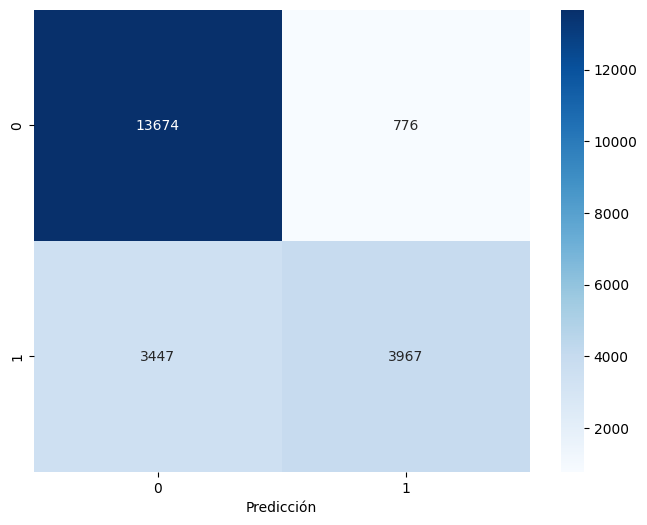

In [79]:
y_pred_prob = model.predict(X_test_std)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicción')
plt

#### Modificando parametros
##### A continuación se realizaron diversas variaciones para buscar los parámetros que podrían ajustarse mejor, entre las decisiones usamos Relu como función de activación para las capas de entrada y ocultas, y para la de salida Sigmoid que era la que se adapta mejor al problema que estamos resolviendo en este proyecto, alternamos con Sigmoid en las capas ocultas pero los resultados favorecían a usar Relu. También probamos algunos rectificadores l1 y l2 en algunos modelos. En la función de optimización usamos Descenso de Gradiente Estocástico (SGD), Nadam y Adam siendo este ultimo el que mejor se comporto.

##### Variación de las capas
##### Se evaluó el rendimiento de una red neuronal variando el número de capas ocultas de 2 a 7. Para cada configuración, se entrenó un modelo y se registró su precisión y pérdida. Posteriormente, se graficaron estos resultados para visualizar el impacto del número de capas en el rendimiento.

In [61]:
# Agregar una capa densa inicial con 129 neuronas de entrada y activación ReLU
historiales_por_capas = {}
# Agregar capas ocultas adicionales
for num_capas in range(2, 8):

    model2 = Sequential()
    # Agregar una capa de salida con una neurona y activación sigmoide
    model2.add(Dense(22, input_dim=22, activation='relu'))

    for _ in range(num_capas - 1):
        model2.add(Dense(16, activation='relu'))
    model2.add(Dense(1, activation='sigmoid'))
# Compilar el modelo con función de pérdida
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Entrenar al modelo en los datos de entrenamiento
    history = model2.fit(X_train_std, y_train, epochs=10, batch_size=8, verbose=0)

    historiales_por_capas[num_capas] = history

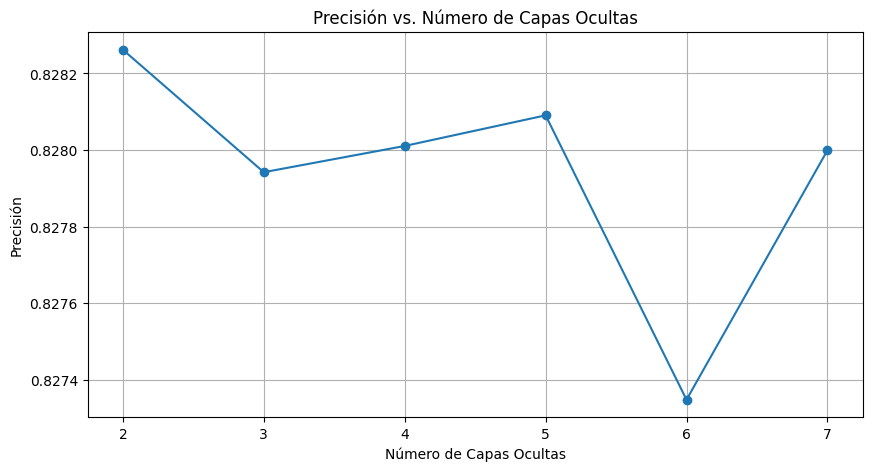

In [64]:
# Crear un gráfico de línea que muestra la relación entre el número de capas ocultas y la precisión
import matplotlib.pyplot as plt

num_capas = list(range(2, 8))
precisions = [historiales_por_capas[i].history['accuracy'][-1] for i in num_capas]

plt.figure(figsize=(10, 5))
plt.plot(num_capas, precisions, marker='o', linestyle='-')
plt.title('Precisión vs. Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

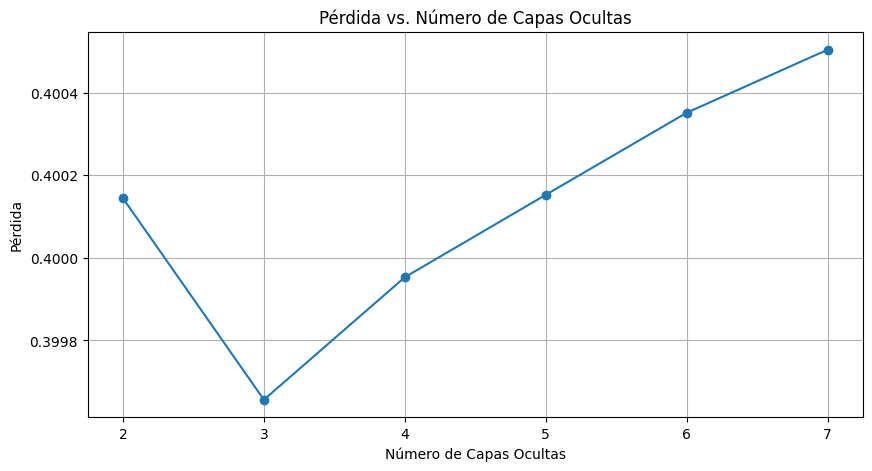

In [65]:
# Crear una lista de pérdidas
losses = [historiales_por_capas[i].history['loss'][-1] for i in num_capas]

plt.figure(figsize=(10, 5))
plt.plot(num_capas, losses, marker='o', linestyle='-')
plt.title('Pérdida vs. Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

##### Se evaluó el rendimiento de una red neuronal variando el número de capas ocultas de 2 a 7. Para cada configuración, se entrenó un modelo y se registró su precisión y pérdida. Posteriormente, se graficaron estos resultados para visualizar el impacto del número de capas en el rendimiento.

In [66]:
# Crear un DataFrame que almacena información sobre el número de capas ocultas, pérdida y precisión
df_results = pd.DataFrame({
    'Número de Capas Ocultas': num_capas,
    'Pérdida': losses,
    'Precisión': precisions
})

#Visualizar los resultados
print(df_results)


   Número de Capas Ocultas   Pérdida  Precisión
0                        2  0.400144   0.828262
1                        3  0.399656   0.827942
2                        4  0.399953   0.828010
3                        5  0.400153   0.828090
4                        6  0.400352   0.827347
5                        7  0.400504   0.827999


##### Variación de las Neuronas Capa de Entrada
##### Se exploró el impacto del número de neuronas en la primera capa oculta de una red neuronal. Para ello, se varió el número de neuronas en un rango logarítmico desde 10 hasta 1000. Cada modelo, con un número específico de neuronas, se entrenó y se registró su precisión y pérdida.

In [ ]:
# Creamos una lista de valores de neuronas en un rango específico de 10 a 1000
neuronas_range = np.logspace(np.log10(10), np.log10(1000), num=10).astype(int)
# Generamos un diccionario para almacenar historiales de entrenamiento por número de neuronas
historiales_por_neuronas = {}
# Iterar a través de los valores de neuronas y entrenar modelos de red neuronal
for neuronas in neuronas_range:
# Crear un modelo secuencial de red neuronal con capas ocultas
    model3 = Sequential()
    model3.add(Dense(neuronas, input_dim=22, activation='relu'))
    model3.add(Dense(80, activation='sigmoid'))
    model3.add(Dense(60, activation='sigmoid'))
    model3.add(Dense(20, activation='sigmoid'))
    model3.add(Dense(10, activation='sigmoid'))

# Compilar el modelo con función de pérdida, optimizador y métricas
    model3.add(Dense(1, activation='sigmoid'))

    model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Entrenar el modelo y almacenar el historial de entrenamiento en el diccionario
    history = model3.fit(X_train_std, y_train, epochs=20, batch_size=20, verbose=0)

    historiales_por_neuronas[neuronas] = history

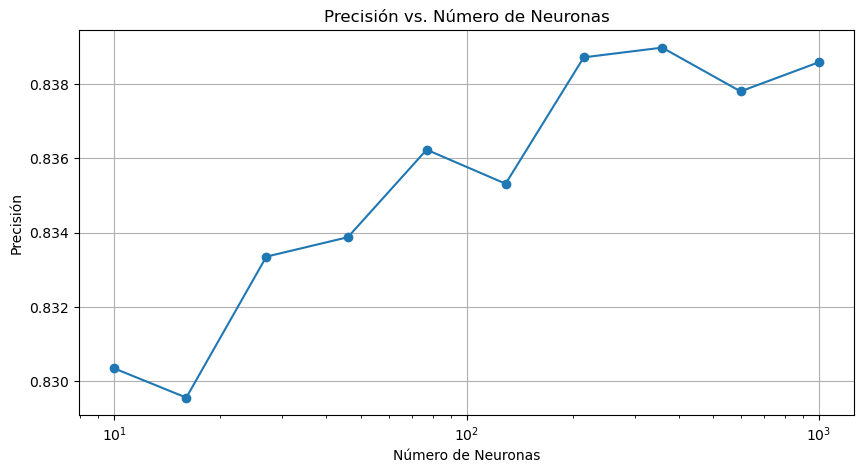

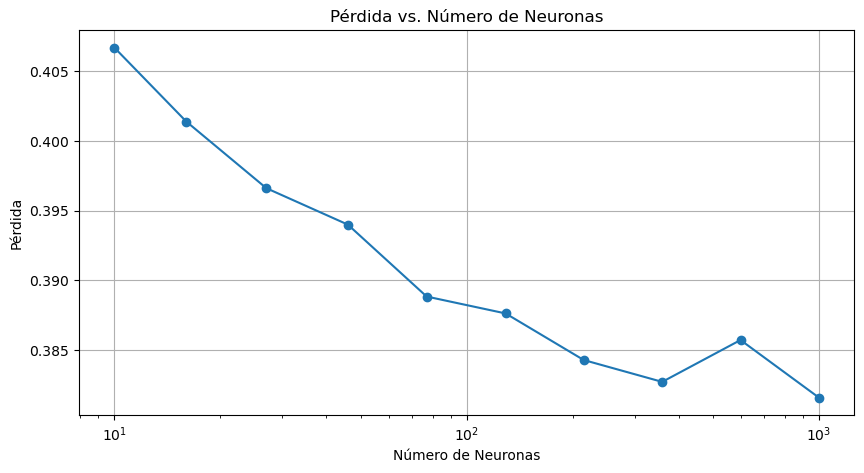

In [ ]:
# Convertimos el rango de valores de neuronas en una lista
neuronas_list = list(neuronas_range)
# Crear una lista de precisión final para cada valor de neuronas
precisions_neuronas = [historiales_por_neuronas[neuronas].history['accuracy'][-1] for neuronas in neuronas_list]
# Crear una lista de pérdida final para cada valor de neuronas
losses_neuronas = [historiales_por_neuronas[neuronas].history['loss'][-1] for neuronas in neuronas_list]
#Generamos el grafico de precision
plt.figure(figsize=(10, 5))
plt.plot(neuronas_list, precisions_neuronas, marker='o', linestyle='-')
plt.title('Precisión vs. Número de Neuronas')
plt.xlabel('Número de Neuronas')
plt.ylabel('Precisión')
plt.grid(True)
plt.xscale('log')
plt.show()

#Generamos el grafico de perdida
plt.figure(figsize=(10, 5))
plt.plot(neuronas_list, losses_neuronas, marker='o', linestyle='-')
plt.title('Pérdida vs. Número de Neuronas')
plt.xlabel('Número de Neuronas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.xscale('log')
plt.show()


In [ ]:
# Generamos un DataFrame con los resultados de neuronas
df_neuronas = pd.DataFrame({
    'Número de Neuronas': neuronas_list,
    'Precisión': precisions_neuronas,
    'Pérdida': losses_neuronas
})

# Mostrar el DataFrame
print(df_neuronas)

   Número de Neuronas  Precisión   Pérdida
0                  10   0.830349  0.406684
1                  16   0.829565  0.401387
2                  27   0.833355  0.396614
3                  46   0.833878  0.394003
4                  77   0.836231  0.388851
5                 129   0.835316  0.387640
6                 215   0.838714  0.384302
7                 359   0.838975  0.382737
8                 599   0.837799  0.385735
9                1000   0.838583  0.381609


##### El resultado mostró variaciones menores en la precisión y la pérdida a medida que se aumentaba el número de capas, lo que proporciona información valiosa sobre cómo la arquitectura de la red afecta su rendimiento en la búsqueda del mejor modelo.

##### Análisis usando Relu en las capas ocultas

In [ ]:
# Crear una lista de valores de neuronas en una escala logarítmica
neuronas_range = np.logspace(np.log10(10), np.log10(1000), num=10).astype(int)
# Crear un diccionario para almacenar los historiales de entrenamiento por número de neuronas
historiales_por_neuronas = {}
# Iterar a través de los valores de neuronas
for neuronas in neuronas_range:
# Crear un modelo de red neuronal con la estructura deseada
    model31 = Sequential()
    model31.add(Dense(neuronas, input_dim=22, activation='relu'))
    model31.add(Dense(80, activation='relu'))
    model31.add(Dense(60, activation='relu'))
    model31.add(Dense(20, activation='relu'))
    model31.add(Dense(10, activation='relu'))

# Compilar el modelo con la función de pérdida y optimizador
    model31.add(Dense(1, activation='sigmoid'))

    model31.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Entrenar el modelo y guardar su historial
    history = model31.fit(X_train_std, y_train, epochs=20, batch_size=20, verbose=0)
# Almacenar el historial en el diccionario usando el número de neuronas como clave = "neuronas"
    historiales_por_neuronas[neuronas] = history

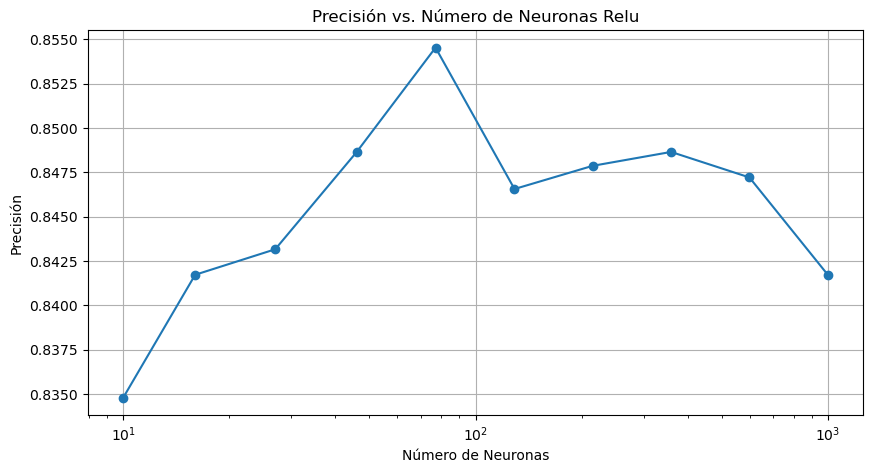

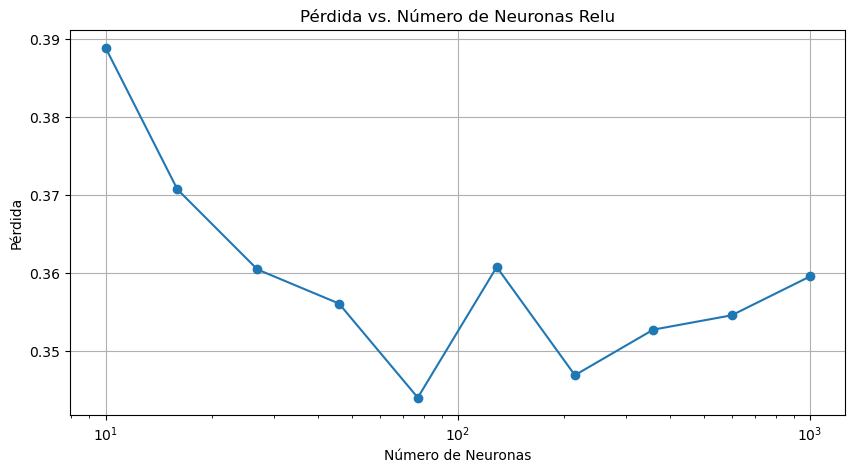

In [ ]:
# Crear una lista de números de neuronas en la capa oculta
neuronas_list = list(neuronas_range)

# Crear una lista de precisión final para cada número de neuronas
precisions_neuronas = [historiales_por_neuronas[neuronas].history['accuracy'][-1] for neuronas in neuronas_list]
# Crear una lista de pérdida final para cada número de neuronas
losses_neuronas = [historiales_por_neuronas[neuronas].history['loss'][-1] for neuronas in neuronas_list]

#Graficamos la precision y el numero de neuronas
plt.figure(figsize=(10, 5))
plt.plot(neuronas_list, precisions_neuronas, marker='o', linestyle='-')
plt.title('Precisión vs. Número de Neuronas Relu')
plt.xlabel('Número de Neuronas')
plt.ylabel('Precisión')
plt.grid(True)
plt.xscale('log')
plt.show()


#Graficamos la perdida y el numero de neuronas
plt.figure(figsize=(10, 5))
plt.plot(neuronas_list, losses_neuronas, marker='o', linestyle='-')
plt.title('Pérdida vs. Número de Neuronas Relu')
plt.xlabel('Número de Neuronas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.xscale('log')
plt.show()

In [ ]:
# Generamos un DataFrame que contiene el número de neuronas, precisión y pérdida finales
df_neuronas = pd.DataFrame({
    'Número de Neuronas': neuronas_list,
    'Precisión': precisions_neuronas,
    'Pérdida': losses_neuronas
})

# Mostrar el DataFrame
print(df_neuronas)

   Número de Neuronas  Precisión   Pérdida
0                  10   0.834793  0.388946
1                  16   0.841720  0.370760
2                  27   0.843158  0.360491
3                  46   0.848647  0.356119
4                  77   0.854529  0.344053
5                 129   0.846556  0.360805
6                 215   0.847863  0.346931
7                 359   0.848647  0.352775
8                 599   0.847210  0.354611
9                1000   0.841720  0.359599


##### Utilizando ReLU en las capas ocultas, el modelo parece beneficiarse de un aumento en el número de neuronas hasta cierto punto (77 neuronas en este caso). Después de ese punto óptimo, agregar más neuronas podría llevar a un sobreajuste, lo que resulta en un rendimiento decreciente. Tiendo en cuenta que es crucial encontrar un equilibrio adecuado en el número de neuronas para evitar tanto el subajuste como el sobreajuste.

##### Variabilidad de las Épocas
##### En el proceso de optimización del modelo de red neuronal, se analizó el efecto del número de épocas en la precisión y pérdida del modelo, especialmente considerando un dataset con más de cien mil registros. A medida que se incrementaron las épocas de 10 a 150, se observó una tendencia de mejora en la precisión y una disminución en la pérdida.

In [ ]:
# Definimos de un rango de números de épocas (epochs) en una escala logarítmica
epocas_range = np.logspace(np.log10(10), np.log10(150), num=5).astype(int)

# Realizamos la creación de un diccionario para almacenar el historial de entrenamiento por número de épocas
historiales_por_epocas = {}
# Iteración sobre diferentes números de épocas
for epocas in epocas_range:

    # Creación y configuración de un modelo de red neuronal
    model4 = Sequential()
    model4.add(Dense(128, input_dim=22, activation='relu'))
    model4.add(Dense(8, activation='relu'))
    model4.add(Dense(1, activation='sigmoid'))

    model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Entrenamiento del modelo con el número de épocas actual
    history = model4.fit(X_train_std, y_train, epochs=epocas, batch_size=64, verbose = 0)
    # Almacenamiento del historial de entrenamiento en el diccionario
    historiales_por_epocas[epocas] = history

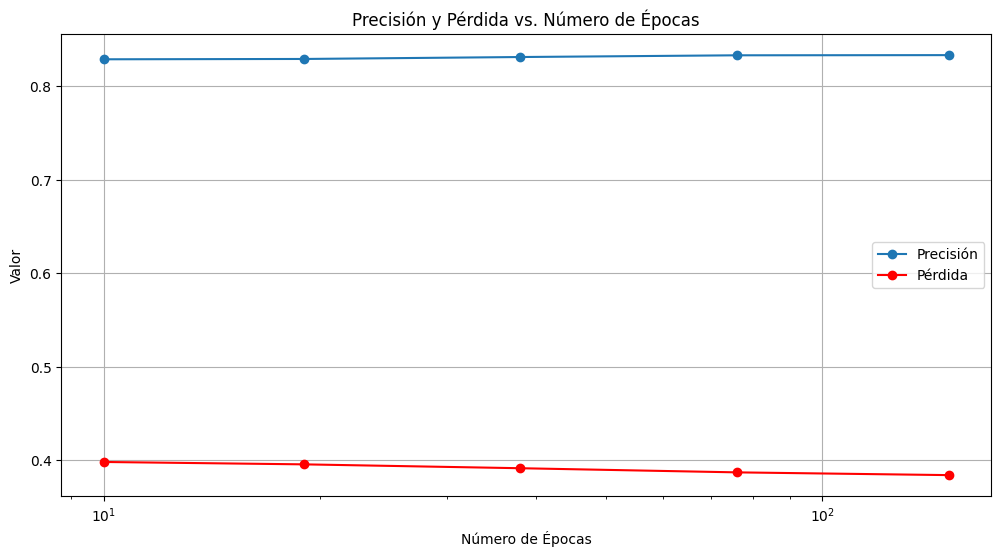

In [87]:
# Creación de una lista de números de épocas a partir del rango
epocas_list = list(epocas_range)
# Extracción de las precisiones finales de los historiales de entrenamiento
precisions = [hist.history['accuracy'][-1] for hist in historiales_por_epocas.values()]
# Extracción de las pérdidas finales de los historiales de entrenamiento
losses = [hist.history['loss'][-1] for hist in historiales_por_epocas.values()]

# Creación del grafico
plt.figure(figsize=(12, 6))


plt.plot(epocas_list, precisions, marker='o', linestyle='-', label='Precisión')

plt.plot(epocas_list, losses, marker='o', linestyle='-', label='Pérdida', color='red')

plt.title('Precisión y Pérdida vs. Número de Épocas')
plt.xlabel('Número de Épocas')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

In [88]:
# Creación de un DataFrame para almacenar los resultados de las épocas
dfepocas = pd.DataFrame({
    'Número de Épocas': epocas_list,
    'Precisión': precisions,
    'Pérdida': losses
})

# Mostrar el DataFrame
print(dfepocas)

   Número de Épocas  Precisión   Pérdida
0                10   0.828880  0.397844
1                19   0.829223  0.395287
2                38   0.831304  0.391145
3                76   0.833145  0.386716
4               150   0.833339  0.383762


##### Es crucial mencionar que, debido a limitaciones de hardware, incrementar excesivamente el número de épocas podría no ser práctico. Por lo tanto, es esencial encontrar un equilibrio que permita obtener un modelo óptimo sin sobrecargar los recursos disponibles.

### 4. Evaluacion de Modelos

#### Modelo 5
##### Este modelo utiliza el optimizador de Descenso de Gradiente Estocástico (SGD) con una tasa de aprendizaje de 0.01 y un momentum de 0.9. La arquitectura de la red neuronal consiste en una capa de entrada con 129 neuronas, seguida de tres capas ocultas con 65, 20 y 8 neuronas respectivamente. Todas estas capas utilizan la función de activación ReLU. La capa de salida tiene una sola neurona con una función de activación sigmoide.

In [110]:
# Importamos la regularización L2 desde la liberia Keras
from keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)
# Creamos un modelo secuencial
model5 = Sequential()
model5.add(Dense(129, input_dim=22, activation='relu'))

model5.add(Dense(65, activation='relu'))
model5.add(Dense(20, activation='relu'))
model5.add(Dense(8, activation='relu'))

model5.add(Dense(1, activation='sigmoid'))
# Agregamos la capa de salida con una unidad de neurona y función de activación sigmoide    
model5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenamos el modelo durante 128 épocas con un tamaño de lote de 20
model5.fit(X_train_std, y_train, epochs= 50, batch_size=64)

Epoch 1/50
1367/1367 [==============================] - 34s 2ms/step - loss: 0.4285 - accuracy: 0.8124
Epoch 2/50
1367/1367 [==============================] - 5s 3ms/step - loss: 0.4049 - accuracy: 0.8266
Epoch 3/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.4027 - accuracy: 0.8270
Epoch 4/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.4010 - accuracy: 0.8277
Epoch 5/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.4004 - accuracy: 0.8279
Epoch 6/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.3994 - accuracy: 0.8281
Epoch 7/50
1367/1367 [==============================] - 4s 3ms/step - loss: 0.3988 - accuracy: 0.8282
Epoch 8/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.3983 - accuracy: 0.8283
Epoch 9/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.3976 - accuracy: 0.8289
Epoch 10/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.39

In [111]:
# Evaluamos el modelo original en el conjunto de datos de prueba y almacenamos la pérdida y la precisión resultante
loss, accuracy = model5.evaluate(X_test_std, y_test)

# Imprimimos la precisión en la consola
print('Precisión: %.2f' % (accuracy*100))

684/684 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8160
Precisión: 81.60


In [112]:
# Realiza predicciones de probabilidades utilizando el modelo model5 en los datos de prueba X_test_std
y_pred_prob = model5.predict(X_test_std)
# Aplica un umbral de decisión de 0.5 para convertir las probabilidades en etiquetas binarias
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
cm

684/684 [==============================] - 1s 1ms/step


array([[13774,   676],
       [ 3348,  4066]])

684/684 [==============================] - 1s 1ms/step


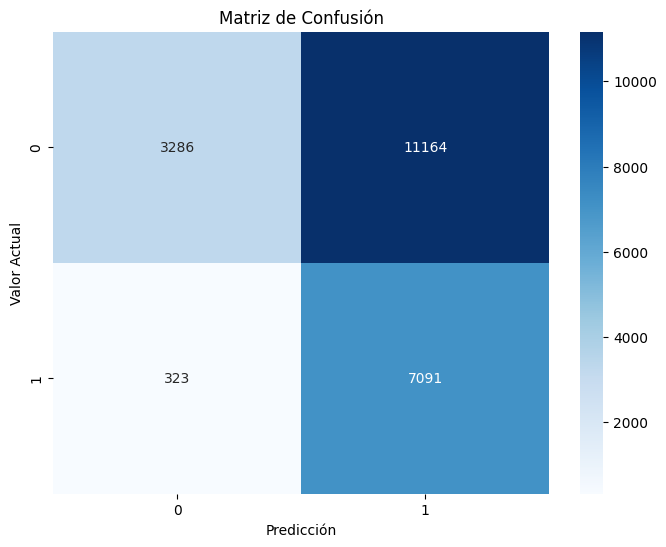

In [114]:
# Realiza predicciones de probabilidades utilizando el modelo model5 en los datos de prueba X_test_std
y_pred_prob = model5.predict(X_test_std)
# Aplica un umbral de decisión de 0.1 para convertir las probabilidades en etiquetas binarias
y_pred = (y_pred_prob > 0.1).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Actual')
plt.title('Matriz de Confusión')
plt.show()


##### La matriz de confusión muestra que el modelo tiene un número significativo de falsos positivos. Esto indica que el modelo está prediciendo más incumplimientos de lo que realmente ocurre en el conjunto de datos de prueba.

#### Modelo 6
##### Este modelo utiliza el optimizador Adam. La arquitectura de la red neuronal consiste en una capa de entrada con 129 neuronas, seguida de 3 capas ocultas con 65, 20 y 8 neuronas respectivamente. Todas estas capas utilizan la función de activación relu. La capa de salida tiene una sola neurona con una función de activación sigmoid.

In [97]:
# Creamos un modelo secuencial llamado "model6"
model6 = Sequential()
# Añade una capa densa (fully connected) con 128 unidades de neuronas y función de activación 'relu' a la entrada del modelo
model6.add(Dense(129, input_dim=22, activation='relu'))

model6.add(Dense(65, activation='relu'))
model6.add(Dense(20, activation='relu'))
model6.add(Dense(8, activation='relu'))

model6.add(Dense(1, activation='sigmoid'))

model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo utilizando los datos de entrenamiento
model6.fit(X_train_std, y_train, epochs= 50, batch_size=64)


Epoch 1/50
1367/1367 [==============================] - 5s 3ms/step - loss: 0.4187 - accuracy: 0.8220
Epoch 2/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.4040 - accuracy: 0.8265
Epoch 3/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.4021 - accuracy: 0.8275
Epoch 4/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.4007 - accuracy: 0.8279
Epoch 5/50
1367/1367 [==============================] - 4s 3ms/step - loss: 0.3998 - accuracy: 0.8277
Epoch 6/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.3998 - accuracy: 0.8283
Epoch 7/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.3984 - accuracy: 0.8291
Epoch 8/50
1367/1367 [==============================] - 3s 2ms/step - loss: 0.3981 - accuracy: 0.8294
Epoch 9/50
1367/1367 [==============================] - 6s 4ms/step - loss: 0.3973 - accuracy: 0.8289
Epoch 10/50
1367/1367 [==============================] - 5s 4ms/step - loss: 0.396

In [98]:
# Evaluamos el modelo original en el conjunto de datos de prueba y almacenamos la pérdida y la precisión resultante
loss, accuracy = model6.evaluate(X_test_std, y_test)
print('Precisión: %.2f' % (accuracy*100))

684/684 [==============================] - 2s 2ms/step - loss: 0.4479 - accuracy: 0.8156
Precisión: 81.56


684/684 [==============================] - 1s 1ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

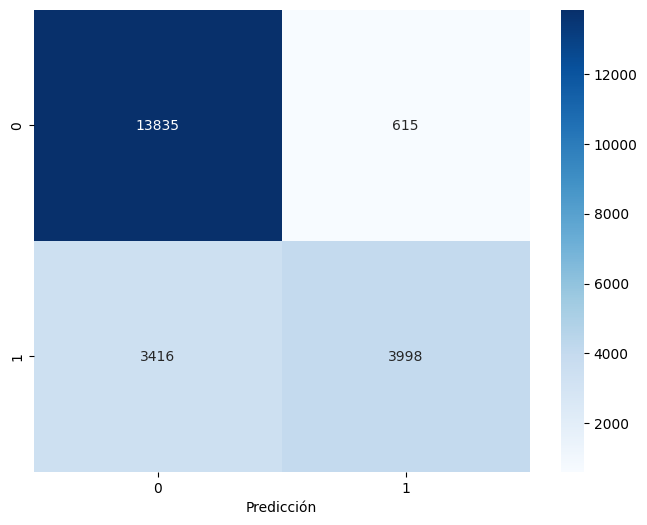

In [104]:
# Realizamos predicciones de probabilidades utilizando el modelo16 en los datos de prueba X_test_std
y_pred_prob = model6.predict(X_test_std)
# Convierte las probabilidades en etiquetas binarias (0 o 1) usando un umbral de 0.5.
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#Generamos el grafico de prediccion de datos
plt.xlabel('Predicción')
plt

##### Este modelo muestra un rendimiento decente con una precisión de entrenamiento de aproximadamente 83.94% y una precisión de prueba de 81.56%. La matriz de confusión indica que el modelo tiene una tendencia a clasificar correctamente los verdaderos negativos.

#### Modelo 7
##### Este modelo utiliza el optimizador Adam. La arquitectura de la red neuronal tiene una capa de entrada con 129 neuronas. Se siguen 4 capas ocultas con 65, 60, 60 y 8 neuronas respectivamente. Todas estas capas utilizan la función de activación relu. Además, se ha aplicado una regularización L2 en la capa de entrada para prevenir el sobreajuste. La capa de salida tiene una sola neurona con una función de activación sigmoid.

In [ ]:
# Importamos la función "l2" del módulo "regularizers" de Keras
from keras.regularizers import l2

# Creamos un modelo secuencial llamado "model7"
model7 = Sequential()
# Añade una capa densa (fully connected) con 128 unidades de neuronas y función de activación 'relu' a la entrada del modelo
model7.add(Dense(129, input_dim=22, activation='relu', kernel_regularizer=l2(0.01)))
model7.add(Dense(65, activation='relu'))
model7.add(Dense(60, activation='relu'))
model7.add(Dense(60, activation='relu'))
model7.add(Dense(8, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))


model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo utilizando los datos de entrenamiento
model7.fit(X_train_std, y_train, epochs= 700, batch_size=16)

Epoch 1/700
4783/4783 [==============================] - 12s 2ms/step - loss: 0.4414 - accuracy: 0.8238
Epoch 2/700
4783/4783 [==============================] - 10s 2ms/step - loss: 0.4158 - accuracy: 0.8263
Epoch 3/700
4783/4783 [==============================] - 11s 2ms/step - loss: 0.4129 - accuracy: 0.8263
Epoch 4/700
4783/4783 [==============================] - 11s 2ms/step - loss: 0.4122 - accuracy: 0.8271
Epoch 5/700
4783/4783 [==============================] - 11s 2ms/step - loss: 0.4106 - accuracy: 0.8268
Epoch 6/700
4783/4783 [==============================] - 11s 2ms/step - loss: 0.4111 - accuracy: 0.8265
Epoch 7/700
4783/4783 [==============================] - 11s 2ms/step - loss: 0.4093 - accuracy: 0.8271
Epoch 8/700
4783/4783 [==============================] - 11s 2ms/step - loss: 0.4095 - accuracy: 0.8269
Epoch 9/700
4783/4783 [==============================] - 10s 2ms/step - loss: 0.4094 - accuracy: 0.8263
Epoch 10/700
4783/4783 [==============================] - 12s 2m

In [ ]:
# Evalúa el modelo en los datos de prueba para obtiene la pérdida y la precisión
loss, accuracy = model7.evaluate(X_test_std, y_test)

# Imprime la precisión del modelo en porcentaje
print('Precisión: %.2f' % (accuracy*100))

1025/1025 [==============================] - 2s 2ms/step - loss: 0.4207 - accuracy: 0.8181
Precisión: 81.81


In [ ]:
# Realiza predicciones de clases sobre los datos de prueba utilizando el modelo
y_pred_prob = model7.predict(X_test_std)
y_pred = (y_pred_prob > 0.5).astype(int)

1025/1025 [==============================] - 4s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21545   219]
 [ 5745  5287]]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

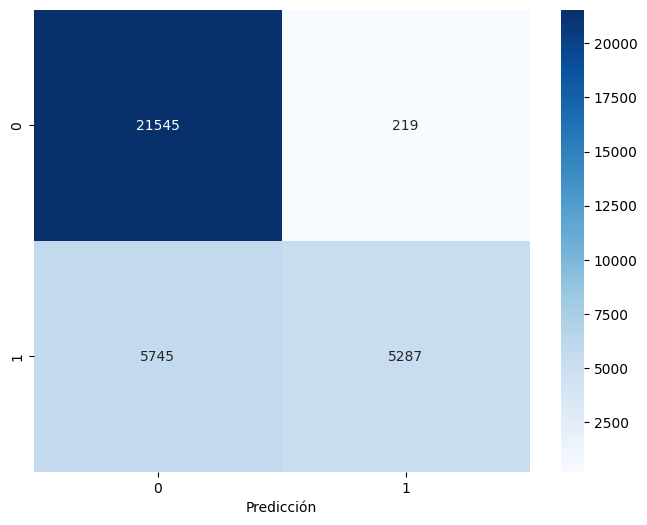

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicción')
plt

##### La matriz de confusión muestra que el modelo tiene una alta capacidad para clasificar correctamente los verdaderos negativos, pero aún hay margen de mejora en la clasificación de los verdaderos positivos. La regularización L2 aplicada ayudo a mejorar la generalización del modelo.

#### Modelo 8
##### Este modelo utiliza el optimizador Adam. La arquitectura de la red neuronal tiene una capa de entrada con 512 neuronas. Se siguen 3 capas ocultas con 256, 128 y 64 neuronas respectivamente. Todas estas capas utilizan la función de activación relu. Además, las primeras tres capas tienen regularización L2 para prevenir el sobreajuste. La capa de salida tiene una sola neurona con una función de activación sigmoid.

In [ ]:
# Importamos la regularización L2 desde Keras
from keras.regularizers import l2
# Creamos un modelo secuencial
model8 = Sequential()
# Añadimos capas densas con diversas cantidades de neuronas, función de activación 'relu' y regularización L2 con parámetro 0.05
model8.add(Dense(512, input_dim=22, activation='relu', kernel_regularizer=l2(0.01)))
model8.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model8.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model8.add(Dense(64, activation='relu'))
model8.add(Dense(1, activation='sigmoid'))


model8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo en los datos estandarizados de entrenamiento durante 200 épocas con un tamaño de lote de 25
model8.fit(X_train_std, y_train, epochs= 200, batch_size=25)

Epoch 1/200
3061/3061 [==============================] - 18s 6ms/step - loss: 0.5254 - accuracy: 0.8217
Epoch 2/200
3061/3061 [==============================] - 19s 6ms/step - loss: 0.4287 - accuracy: 0.8245
Epoch 3/200
3061/3061 [==============================] - 17s 6ms/step - loss: 0.4244 - accuracy: 0.8260
Epoch 4/200
3061/3061 [==============================] - 16s 5ms/step - loss: 0.4226 - accuracy: 0.8256
Epoch 5/200
3061/3061 [==============================] - 17s 5ms/step - loss: 0.4208 - accuracy: 0.8264
Epoch 6/200
3061/3061 [==============================] - 18s 6ms/step - loss: 0.4202 - accuracy: 0.8261
Epoch 7/200
3061/3061 [==============================] - 16s 5ms/step - loss: 0.4192 - accuracy: 0.8265
Epoch 8/200
3061/3061 [==============================] - 16s 5ms/step - loss: 0.4183 - accuracy: 0.8258
Epoch 9/200
3061/3061 [==============================] - 16s 5ms/step - loss: 0.4186 - accuracy: 0.8266
Epoch 10/200
3061/3061 [==============================] - 16s 5m

1025/1025 [==============================] - 2s 2ms/step - loss: 0.4246 - accuracy: 0.8183
Precisión: 81.83
1025/1025 [==============================] - 2s 2ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

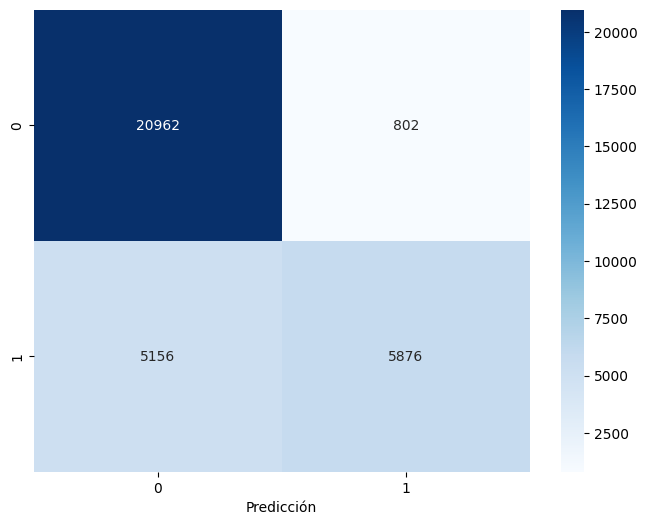

In [ ]:
# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model8.evaluate(X_test_std, y_test)
print('Precisión: %.2f' % (accuracy*100))

# Realizamos las predicciones de probabilidades en el conjunto de prueba
y_pred_prob = model8.predict(X_test_std)
# Conviertimos las probabilidades en etiquetas binarias (0 o 1) utilizando un umbral de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
#Generamos el grafico para mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicción')
plt

##### La matriz de confusión muestra que el modelo tiene una buena capacidad para clasificar correctamente los verdaderos negativos. Sin embargo, hay un número significativo de falsos negativos, lo que indica que el modelo podría mejorarse en la clasificación de los verdaderos positivos.

#### Modelo 9
##### Este modelo utiliza el optimizador Adam. La arquitectura de la red neuronal tiene una capa de entrada con 128 neuronas. Se siguen 3 capas ocultas con 64 neuronas cada una. Todas estas capas utilizan la función de activación relu. La capa de salida tiene una sola neurona con una función de activación sigmoid.

In [57]:
# Creamos un modelo secuencial
model9 = Sequential()
# Añadimos capas densas con diversas cantidades de neuronas, función de activación 'relu' y regularización L2 con parámetro 0.05
model9.add(Dense(128, input_dim=22, activation='relu'))
model9.add(Dense(64, activation='relu'))
model9.add(Dense(64, activation='relu'))
model9.add(Dense(64, activation='relu'))
model9.add(Dense(1, activation='sigmoid'))

model9.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo en los datos estandarizados de entrenamiento durante 500 épocas con un tamaño de lote de 8
model9.fit(X_train_std, y_train, epochs= 500, batch_size=8)

Epoch 1/500
10932/10932 [==============================] - 22s 2ms/step - loss: 0.4126 - accuracy: 0.8242
Epoch 2/500
10932/10932 [==============================] - 21s 2ms/step - loss: 0.4048 - accuracy: 0.8267
Epoch 3/500
10932/10932 [==============================] - 21s 2ms/step - loss: 0.4039 - accuracy: 0.8276
Epoch 4/500
10932/10932 [==============================] - 22s 2ms/step - loss: 0.4018 - accuracy: 0.8273
Epoch 5/500
10932/10932 [==============================] - 25s 2ms/step - loss: 0.4012 - accuracy: 0.8277
Epoch 6/500
10932/10932 [==============================] - 21s 2ms/step - loss: 0.4007 - accuracy: 0.8279
Epoch 7/500
10932/10932 [==============================] - 21s 2ms/step - loss: 0.4000 - accuracy: 0.8284
Epoch 8/500
10932/10932 [==============================] - 22s 2ms/step - loss: 0.3998 - accuracy: 0.8281
Epoch 9/500
10932/10932 [==============================] - 22s 2ms/step - loss: 0.3988 - accuracy: 0.8283
Epoch 10/500
10932/10932 [====================

In [69]:
# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model9.evaluate(X_test_std, y_test)
print('Precisión: %.2f' % (accuracy*100))

684/684 [==============================] - 2s 2ms/step - loss: 0.7630 - accuracy: 0.8121
Precisión: 81.21


684/684 [==============================] - 1s 2ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

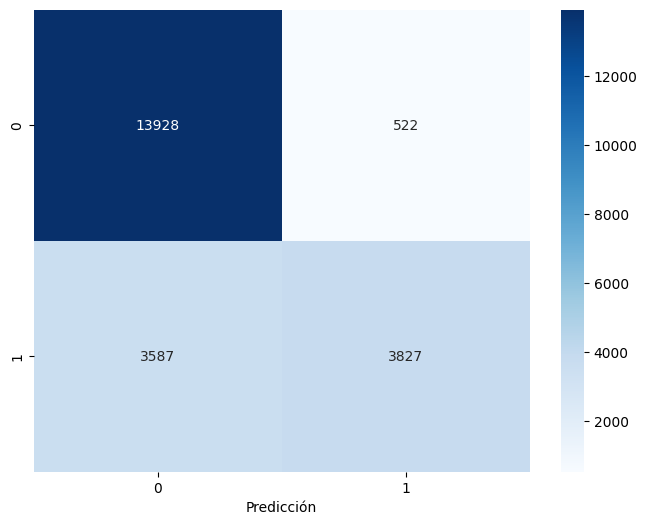

In [60]:
from sklearn.metrics import confusion_matrix
# Realizamos las predicciones de probabilidades en el conjunto de prueba
y_pred_prob = model9.predict(X_test_std)
# Conviertimos las probabilidades en etiquetas binarias (0 o 1) utilizando un umbral de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
#Generamos el grafico para mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicción')
plt

##### La matriz de confusión muestra que el modelo tiene una buena capacidad para clasificar correctamente los verdaderos negativos. Sin embargo, hay un número significativo de falsos negativos, lo que indica que el modelo podría mejorarse en la clasificación de los verdaderos positivos. A pesar de tener una precisión alta en el entrenamiento, la pérdida en la prueba es considerablemente alta, por lo que el modelo esta sobreajustando los datos de entrenamiento y no generalizando bien en datos no vistos.

#### Modelo 10
##### Este modelo utiliza el optimizador Adam. La arquitectura de la red neuronal tiene una capa de entrada con 1000 neuronas. Se siguen 3 capas ocultas con 64 neuronas cada una. Todas estas capas utilizan la función de activación relu. La capa de salida tiene una sola neurona con una función de activación sigmoid.

In [67]:
# Creamos un modelo secuencial
model10 = Sequential()
# Añadimos capas densas con diversas cantidades de neuronas, función de activación 'relu' y regularización L2 con parámetro 0.05
model10.add(Dense(1000, input_dim=22, activation='relu'))
model10.add(Dense(64, activation='relu'))
model10.add(Dense(64, activation='relu'))
model10.add(Dense(64, activation='relu'))
model10.add(Dense(1, activation='sigmoid'))

model10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo en los datos estandarizados de entrenamiento durante 100 épocas con un tamaño de lote de 8
model10.fit(X_train_std, y_train, epochs= 100, batch_size=8)

Epoch 1/100
10932/10932 [==============================] - 31s 3ms/step - loss: 0.4135 - accuracy: 0.8241
Epoch 2/100
10932/10932 [==============================] - 29s 3ms/step - loss: 0.4061 - accuracy: 0.8266
Epoch 3/100
10932/10932 [==============================] - 28s 3ms/step - loss: 0.4040 - accuracy: 0.8268
Epoch 4/100
10932/10932 [==============================] - 29s 3ms/step - loss: 0.4028 - accuracy: 0.8275
Epoch 5/100
10932/10932 [==============================] - 28s 3ms/step - loss: 0.4023 - accuracy: 0.8275
Epoch 6/100
10932/10932 [==============================] - 28s 3ms/step - loss: 0.4013 - accuracy: 0.8272
Epoch 7/100
10932/10932 [==============================] - 30s 3ms/step - loss: 0.4009 - accuracy: 0.8283
Epoch 8/100
10932/10932 [==============================] - 28s 3ms/step - loss: 0.4003 - accuracy: 0.8281
Epoch 9/100
10932/10932 [==============================] - 28s 3ms/step - loss: 0.4000 - accuracy: 0.8281
Epoch 10/100
10932/10932 [====================

In [94]:
# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model10.evaluate(X_test_std, y_test)
print('Precisión: %.2f' % (accuracy*100))

684/684 [==============================] - 2s 2ms/step - loss: 0.6594 - accuracy: 0.8018
Precisión: 80.18


684/684 [==============================] - 4s 6ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

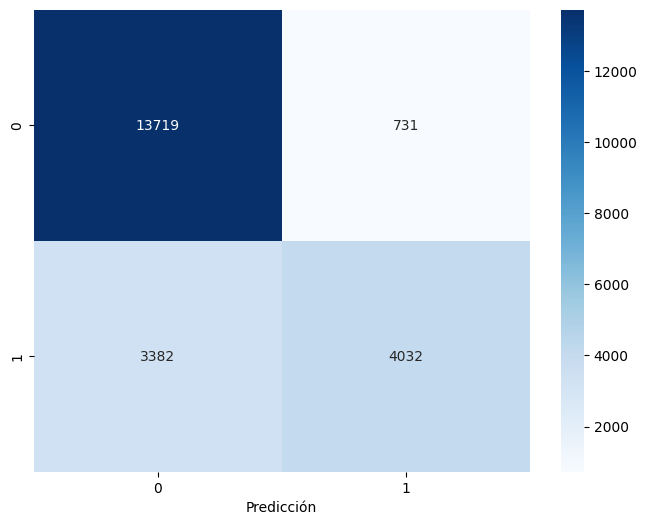

In [72]:
from sklearn.metrics import confusion_matrix
# Realizamos las predicciones de probabilidades en el conjunto de prueba
y_pred_prob = model10.predict(X_test_std)
# Conviertimos las probabilidades en etiquetas binarias (0 o 1) utilizando un umbral de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
#Generamos el grafico para mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicción')
plt

##### El modelo presenta un rendimiento decente en los datos de entrenamiento, pero muestra una pérdida más alta en los datos de prueba, lo que sugiere que esta en sobreajuste. La matriz de confusión indica que el modelo tiene una buena capacidad para clasificar correctamente los verdaderos negativos y verdaderos positivos.

#### Modelo 11
##### Este modelo utiliza el optimizador Adam. La arquitectura de la red neuronal tiene una capa de entrada con 128 neuronas. Se siguen 3 capas ocultas, la primera y segunda con 128 neuronas y la tercera y cuarta con 64 neuronas cada una. Todas estas capas utilizan la función de activación relu. La capa de salida tiene una sola neurona con una función de activación sigmoid.

In [93]:
# Creamos un modelo secuencial
model11 = Sequential()
# Añadimos capas densas con diversas cantidades de neuronas, función de activación 'relu' y regularización L2 con parámetro 0.05
model11.add(Dense(128, input_dim=22, activation='relu'))
model11.add(Dense(128, activation='relu'))
model11.add(Dense(64, activation='relu'))
model11.add(Dense(64, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))

model11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo en los datos estandarizados de entrenamiento durante 100 épocas con un tamaño de lote de 64
model11.fit(X_train_std, y_train, epochs= 100, batch_size=64)

Epoch 1/100
1367/1367 [==============================] - 8s 4ms/step - loss: 0.4149 - accuracy: 0.8230
Epoch 2/100
1367/1367 [==============================] - 3s 2ms/step - loss: 0.4037 - accuracy: 0.8269
Epoch 3/100
1367/1367 [==============================] - 3s 2ms/step - loss: 0.4022 - accuracy: 0.8271
Epoch 4/100
1367/1367 [==============================] - 5s 3ms/step - loss: 0.4005 - accuracy: 0.8270
Epoch 5/100
1367/1367 [==============================] - 3s 2ms/step - loss: 0.3995 - accuracy: 0.8278
Epoch 6/100
1367/1367 [==============================] - 3s 2ms/step - loss: 0.3987 - accuracy: 0.8281
Epoch 7/100
1367/1367 [==============================] - 3s 2ms/step - loss: 0.3979 - accuracy: 0.8288
Epoch 8/100
1367/1367 [==============================] - 4s 3ms/step - loss: 0.3975 - accuracy: 0.8291
Epoch 9/100
1367/1367 [==============================] - 4s 3ms/step - loss: 0.3972 - accuracy: 0.8287
Epoch 10/100
1367/1367 [==============================] - 3s 2ms/step - l

In [95]:
# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model11.evaluate(X_test_std, y_test)
print('Precisión: %.2f' % (accuracy*100))

684/684 [==============================] - 1s 2ms/step - loss: 0.6609 - accuracy: 0.8008
Precisión: 80.08


684/684 [==============================] - 1s 2ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

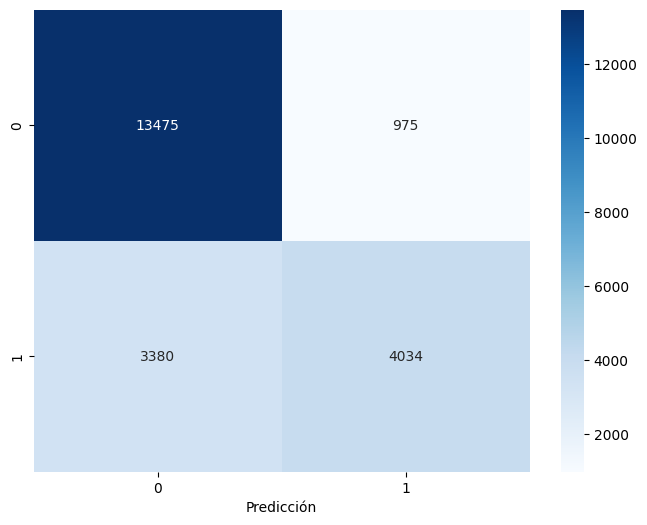

In [96]:
# Realizamos las predicciones de probabilidades en el conjunto de prueba
y_pred_prob = model11.predict(X_test_std)
# Conviertimos las probabilidades en etiquetas binarias (0 o 1) utilizando un umbral de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
#Generamos el grafico para mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicción')
plt

##### El modelo muestra un buen rendimiento en los datos de entrenamiento, pero al igual que en modelos anteriores, presenta una pérdida más alta en los datos de prueba, lo que indica un sobreajuste. La matriz de confusión muestra que el modelo tiene una capacidad razonable para clasificar correctamente los verdaderos negativos y verdaderos positivos.

##### Llegando a una decisión:
##### Basándonos en los datos, podemos evaluar los modelos según diferentes criterios:
##### Precisión de Entrenamiento: Esta métrica nos indica qué tan bien el modelo se desempeña en los datos con los que fue entrenado.
##### Precisión de Prueba: Esta métrica nos indica qué tan bien el modelo se desempeña en datos que no ha visto anteriormente, lo que nos da una idea de su capacidad de generalización.
##### Pérdida de Prueba: Nos da una idea de cuánto se equivoca el modelo en sus predicciones en el conjunto de prueba.
##### Diferencia entre Precisión de Entrenamiento y Prueba: Una gran diferencia entre estas métricas puede indicar sobreajuste, lo que significa que el modelo se desempeña muy bien en los datos de entrenamiento pero no tan bien en datos no vistos.
##### Arquitectura y Complejidad del Modelo: Modelos más complejos pueden tener una mayor capacidad de adaptarse a los datos, pero también son más propensos al sobreajuste y requieren más recursos computacionales.
##### Evaluando los modelos según estos criterios, observamos lo siguiente:
##### Modelo 5: Tiene una precisión de entrenamiento y prueba bastante similar, lo que indica que no hay un sobreajuste significativo. Sin embargo, su precisión de prueba es de 83.21%, lo que es decente pero no el más alto entre los modelos presentados.
##### Modelo 6: Aunque tiene la precisión de entrenamiento más alta (83.94%), su precisión de prueba es de 81.56%, lo que indica una posible tendencia al sobreajuste.
##### Modelo 7: Tiene una precisión de prueba de 81.81%, que es ligeramente inferior a la del Modelo 5.
##### Modelo 8: Su precisión de prueba es de 81.83%, similar al Modelo 7, pero con una arquitectura más compleja.
##### Modelo 9: A pesar de tener la precisión de entrenamiento más alta (85.00%), su precisión de prueba es de 81.21%, y su pérdida en la prueba es considerablemente alta, lo que indica un sobreajuste significativo.
##### Modelo 10: Tiene una precisión de prueba de 80.18%, que es la segunda más baja entre los modelos presentados.
##### Modelo 11: Aunque tiene la precisión de entrenamiento más alta entre todos los modelos (86.05%), su precisión de prueba es la más baja (80.08%).
##### Decisión final :
##### Basándonos en la precisión de prueba (que es una métrica clave para evaluar la capacidad de generalización de un modelo), el Modelo 5 parece ser el mejor con una precisión de 83.21% y una estructura no tan compleja. Con una predicción razonable entre falsos positivos equilibrada lo que ofrece una métrica de predicción razonable con este set de datos para proceder a una implementación en producción. 
